# General Import

In [47]:
%load_ext autoreload
%autoreload 2

import numpy as np

from myutils.loaders import *
from myutils.processors import toGreyscale, toBinary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image


GT_PATH = "./dataset/masks/gt/"

# IOU + AP

In [2]:
from myutils.score import *
from myutils import CLIPSeg, DSS

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


### CLIPSeg

In [3]:
_, segment_ = CLIPSeg.get_segment(["bee"])

In [4]:
# Global Thresholding iterating CLIPSeg

t, score, duration = getBestMeanIOU(segment_, pred_idx=0)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...:   0%|                                              | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [11:12<00:00,  1.08it/s]

MIOU=68.09% at t=0.78, takes 672.80s in total, 0.93s per image.


In [4]:
# best t per image by interating CLIPSeg

score, duration = getBestMeanIOU_ng(segment_, pred_idx=0)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...:   0%|                                              | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [10:41<00:00,  1.13it/s]

MIOU=73.23%, takes 641.38s in total, 0.88s per image.


In [5]:
# Otsu's method CLIPSeg

score, duration = getMeanIOU(segment_, pred_idx=0, bi_mode=2)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [06:54<00:00,  1.75it/s]

MIOU=42.21%, takes 414.20s in total, 0.57s per image.


In [8]:
# Otsu's method CLIPSeg sigmoid

score, duration = getMeanIOU(segment_, pred_idx=0, gs_mode=2, bi_mode=2)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:10<05:58,  1.98it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [06:28<00:00,  1.87it/s]

MIOU=55.79%, takes 388.56s in total, 0.54s per image.


In [9]:
# best t per image by interating CLIPSeg

score, duration = getBestMeanIOU_ng(segment_, pred_idx=0, gs_mode=2)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:16<09:57,  1.19it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [13:03<00:00,  1.08s/it]

MIOU=55.13%, takes 783.89s in total, 1.08s per image.


In [9]:
# AP
from myutils.score import getMeanAP

_, segment_ = CLIPSeg.get_segment(["bee"])
score, duration = getMeanAP(segment_, pred_idx=0)

Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [02:00<00:00,  6.05it/s]

mAP=88.88%, takes 120.07s in total, 0.17s per image.


### DSS

In [ ]:
# Global Thresholding iterating DSS
_, _, segment_ = DSS.get_segment()
t, score, duration = getBestMeanIOU(segment_, pred_idx=0)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:21<12:38,  1.07s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [10:45<00:00,  1.12it/s]

MIOU=72.48% at t=0.32, takes 645.70s in total, 0.89s per image.


In [7]:
# best t per image by interating DSS
_, _, segment_ = DSS.get_segment()
score, duration = getBestMeanIOU_ng(segment_, pred_idx=0)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [12:18<00:00,  1.02s/it]

MIOU=75.85%, takes 738.45s in total, 1.02s per image.


In [ ]:
# Otsu's method DSS
_, _, segment_ = DSS.get_segment()
score, duration = getMeanIOU(segment_, pred_idx=0, bi_mode=2)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:08<05:43,  2.06it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [07:38<00:00,  1.58it/s]

MIOU=70.30%, takes 458.94s in total, 0.63s per image.


In [8]:
# Cut Res in Contrast
_, _, segment_ = DSS.get_segment()
score, duration = getMeanIOU(segment_, pred_idx=0, t=0.32)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:23<00:00,  2.24it/s]

MIOU=72.48%, takes 323.41s in total, 0.45s per image.


In [7]:
# test Full Res

from myutils import DSS_FULLRES

_, _, segment_ = DSS_FULLRES.get_segment()
score, duration = getMeanIOU(segment_, pred_idx=0, t=0.32)
# print(f"mIOU is {score}, duration: {duration}")

Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


Calculating Mean IOU...:  24%|████████▋                           | 175/726 [02:59<22:52,  2.49s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 4032 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  36%|████████████▊                       | 259/726 [05:29<10:45,  1.38s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 620 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  56%|████████████████████                | 404/726 [09:40<07:46,  1.45s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 3072 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  58%|████████████████████▉               | 421/726 [10:02<05:53,  1.16s/it]c:\Users\yita

MIOU=70.20%, takes 919.43s in total, 1.27s per image.


In [39]:
# test Full Res

from myutils import DSS_FULLRES

_, _, segment_ = DSS_FULLRES.get_segment()
score, duration = getMeanAP(segment_, pred_idx=0)
# print(f"mIOU is {score}, duration: {duration}")

Calculating Mean AP...:  24%|████████▉                            | 175/726 [08:14<38:47,  4.22s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 4032 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean AP...:  36%|█████████████▏                       | 259/726 [14:00<40:01,  5.14s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 620 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean AP...:  56%|████████████████████▌                | 404/726 [21:38<10:26,  1.95s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 3072 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean AP...:  58%|█████████████████████▍               | 421/726 [21:58<04:21,  1.17it/s]c:\Users\yita

mAP=88.47%, takes 2017.07s in total, 2.78s per image.


In [11]:
# best t per image by interating DSS
_, _, segment_ = DSS_FULLRES.get_segment()
score, duration = getBestMeanIOU_ng(segment_, pred_idx=0)

Calculating Mean IOU...:  24%|████████▋                           | 175/726 [05:56<29:54,  3.26s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 4032 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  36%|████████████▊                       | 259/726 [09:29<29:01,  3.73s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 620 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  56%|████████████████████                | 404/726 [13:10<04:54,  1.09it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 3072 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  58%|████████████████████▉               | 421/726 [13:24<03:49,  1.33it/s]c:\Users\yita

MIOU=74.84%, takes 1116.58s in total, 1.54s per image.


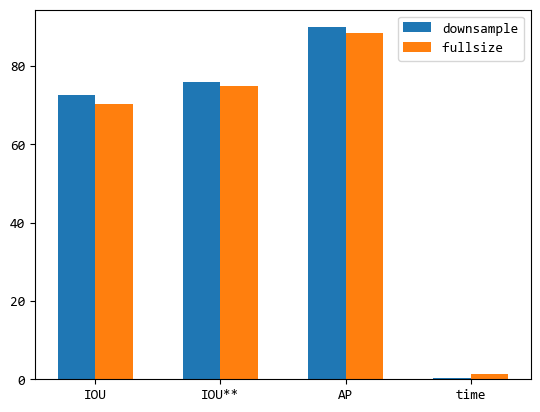

In [94]:
# Visualization
plt.rcParams["font.sans-serif"] = ["Consolas"]


x = np.arange(4)  # 柱状图在横坐标上的位置
y1 = [72.48, 75.85, 89.85, 0.45]
y2 = [70.2, 74.84, 88.47, 1.27]

bar_width = 0.3  # 设置柱状图的宽度
tick_label = ["IOU", "IOU**", "AP", "time"]

# 绘制并列柱状图
plt.bar(x, y1, bar_width, label="downsample")
plt.bar(x + bar_width, y2, bar_width, label="fullsize")

plt.legend()
plt.xticks(x + bar_width / 2, tick_label)
plt.show()

In [6]:
# Sparse
_, _, segment_ = DSS.get_segment(_todense=False)
t, score, duration = getBestMeanIOU(segment_, pred_idx=0)

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [14:56<00:00,  1.23s/it]

MIOU=72.48% at t=0.32, takes 896.57s in total, 1.23s per image.


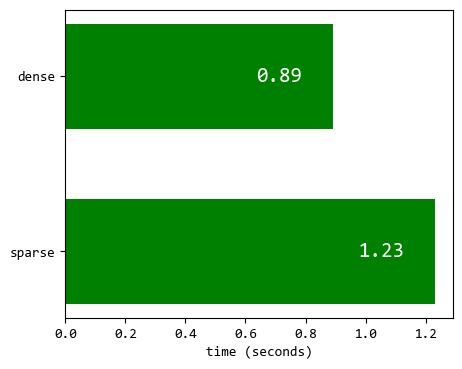

In [78]:
from turtle import color
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["Consolas"]

y = np.arange(2)  # 柱状图在纵坐标上的位置
data = [1.23, 0.89]
labels = ["sparse", "dense"]

plt.figure(figsize=(5, 4))
# 绘制水平柱状图
bars = plt.barh(y, data, color="g", height=0.6, linewidth=0.3)  # 使用绿色表示数据，并调整线条粗细
plt.yticks(y, labels)  # 设置纵坐标的标签

plt.xlabel("time (seconds)")  # 设置横坐标标签

# 在每个柱子的右侧标注数值
for bar, value in zip(bars, data):
    plt.text(
        value - 0.1,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}",
        ha="right",
        va="center",
        color="white",
        fontsize=15,
    )

plt.show()

In [12]:
# DSS AP
_, _, segment_ = DSS.get_segment()
score, duration = getMeanAP(segment_, pred_idx=0)

Calculating Mean AP...:   2%|▉                                     | 18/726 [00:10<06:25,  1.83it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [07:40<00:00,  1.58it/s]

mAP=89.85%, takes 460.91s in total, 0.63s per image.


### Prompts

In [5]:
# IOU prompts 2
prompts = ["bee", "bee without trees", "bee without leaves", "bee without flowers", "bee without plants"]

for p in prompts:
    _, segment_ = CLIPSeg.get_segment([p])
    score, duration = getMeanIOU(segment_, pred_idx=0, t=0.78)

Calculating Mean IOU...:   0%|                                              | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:41<00:00, 17.67it/s]


MIOU=68.09%, takes 41.08s in total, 0.06s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:40<00:00, 17.97it/s]


MIOU=63.05%, takes 40.40s in total, 0.06s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:41<00:00, 17.70it/s]


MIOU=60.97%, takes 41.03s in total, 0.06s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:41<00:00, 17.66it/s]


MIOU=44.01%, takes 41.11s in total, 0.06s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:40<00:00, 17.99it/s]

MIOU=59.26%, takes 40.35s in total, 0.06s per image.


In [7]:
# IOU prompts 2 iterate
prompts = ["bee", "bee without trees", "bee without leaves", "bee without flowers", "bee without plants"]

for p in prompts:
    _, segment_ = CLIPSeg.get_segment([p])
    t, score, duration = getBestMeanIOU(segment_, pred_idx=0)

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:03<00:00,  2.39it/s]


MIOU=68.09% at t=0.78, takes 303.38s in total, 0.42s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:00<00:00,  2.42it/s]


MIOU=67.15% at t=0.72, takes 300.45s in total, 0.41s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:02<00:00,  2.40it/s]


MIOU=63.35% at t=0.74, takes 302.13s in total, 0.42s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:06<00:00,  2.37it/s]


MIOU=44.59% at t=0.74, takes 306.85s in total, 0.42s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:03<00:00,  2.39it/s]

MIOU=60.15% at t=0.74, takes 303.93s in total, 0.42s per image.


In [59]:
# IOU prompts 2
prompts = ["bee", "bee without trees", "bee without leaves", "bee without flowers", "bee without plants"]

for p in prompts:
    _, segment_ = CLIPSeg.get_segment([p])
    score, duration = getMeanAP(segment_, pred_idx=0)

Calculating Mean AP...:   0%|                                               | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [01:59<00:00,  6.08it/s]


mAP=88.88%, takes 119.49s in total, 0.16s per image.


Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [02:00<00:00,  6.04it/s]


mAP=89.92%, takes 120.21s in total, 0.17s per image.


Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [02:03<00:00,  5.89it/s]


mAP=87.12%, takes 123.34s in total, 0.17s per image.


Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [02:06<00:00,  5.75it/s]


mAP=64.38%, takes 126.24s in total, 0.17s per image.


Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [02:00<00:00,  6.02it/s]

mAP=82.83%, takes 120.69s in total, 0.17s per image.


(5, 3)


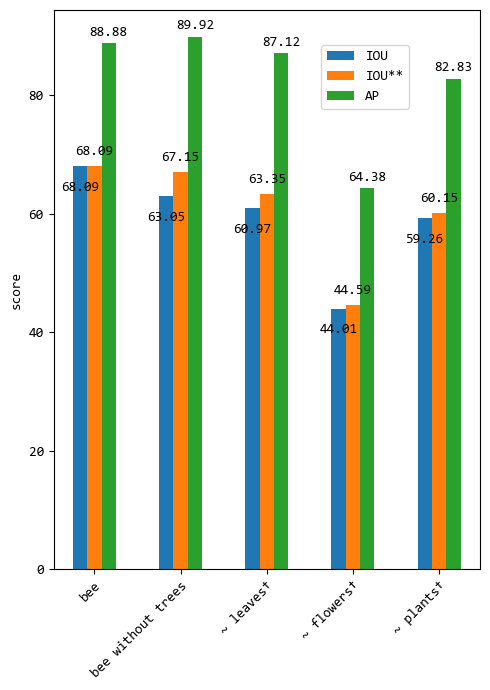

In [92]:
# Visualization
data = np.array(
    [[68.09, 68.09, 88.88], [63.05, 67.15, 89.92], [60.97, 63.35, 87.12], [44.01, 44.59, 64.38], [59.26, 60.15, 82.83]]
)
print(data.shape)

# 提取AP和IOU数据
iou_data = data[:, 0]
iou_data_2 = data[:, 1]
ap_data = data[:, 2]

# 柱状图的位置
x = np.arange(5)

# 绘制柱状图
fig, ax = plt.subplots(figsize=(5, 7))
width = 1  # 柱子的宽度
rects1 = ax.bar(x - width / 6, iou_data, width / 6, label="IOU")
rects2 = ax.bar(x, iou_data_2, width / 6, label="IOU**")
rects3 = ax.bar(x + width / 6, ap_data, width / 6, label="AP")

# 添加标题和标签
ax.set_ylabel("score")

# 旋转横轴标签，竖着从下往上书写
ax.set_xticks(x)
ax.set_xticklabels(["bee", "bee without trees", "~ leaves†", "~ flowers†", "~ plants†"])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# 在每个柱子的顶部标注数值
# 在每个柱子的顶部标注IOU数值
for rect in rects1:
    height = rect.get_height()
    ax.annotate(
        f"{height:.2f}",  # 控制小数点后的位数
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, -20),  # 调整垂直方向的偏移
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# 在每个柱子的底部标注IOU(t)数值
for rect in rects2:
    height = rect.get_height()
    ax.annotate(
        f"{height:.2f}",
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 15),  # 调整垂直方向的偏移，使其在柱子下方
        textcoords="offset points",
        ha="center",
        va="top",
    )

# 在每个柱子的顶部标注AP数值
for rect in rects3:
    height = rect.get_height()
    ax.annotate(
        f"{height:.2f}",
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )


ax.legend(loc="upper right", bbox_to_anchor=(0.85, 0.95))  # 调整图例的位置

# 显示柱状图
plt.tight_layout()
plt.show()

In [6]:
# IOU prompts 1 iterate
prompts = [
    "insect shaped",
    "insect shaped creature",
    "insect shaped creature with wings",
    "insect shaped creature with wings that can fly",
]

for p in prompts:
    _, segment_ = CLIPSeg.get_segment([p])
    score, duration = getMeanIOU(segment_, pred_idx=0, t=0.78)

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:40<00:00, 18.02it/s]


MIOU=72.79%, takes 40.29s in total, 0.06s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:41<00:00, 17.50it/s]


MIOU=73.75%, takes 41.49s in total, 0.06s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:41<00:00, 17.66it/s]


MIOU=71.40%, takes 41.12s in total, 0.06s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:41<00:00, 17.65it/s]

MIOU=70.15%, takes 41.14s in total, 0.06s per image.


In [6]:
# IOU prompts 1 iterate
prompts = [
    "insect shaped",
    "insect shaped creature",
    "insect shaped creature with wings",
    "insect shaped creature with wings that can fly",
]

for p in prompts:
    _, segment_ = CLIPSeg.get_segment([p])
    t, score, duration = getBestMeanIOU(segment_, pred_idx=0)

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [04:59<00:00,  2.42it/s]


MIOU=72.79% at t=0.78, takes 299.69s in total, 0.41s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:31<00:00,  2.19it/s]


MIOU=73.75% at t=0.78, takes 331.94s in total, 0.46s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:11<00:00,  2.33it/s]


MIOU=72.50% at t=0.74, takes 311.52s in total, 0.43s per image.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:19<00:00,  2.27it/s]

MIOU=71.47% at t=0.74, takes 319.37s in total, 0.44s per image.


In [ ]:
# AP prompts 1
prompts = [
    "insect shaped",
    "insect shaped creature",
    "insect shaped creature with wings",
    "insect shaped creature with wings that can fly",
]

for p in prompts:
    _, segment_ = CLIPSeg.get_segment([p])
    score, duration = getMeanAP(segment_, pred_idx=0)

Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [01:59<00:00,  6.05it/s]


mAP=92.29%, takes 119.94s in total, 0.17s per image.


Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [02:01<00:00,  5.97it/s]


mAP=93.31%, takes 121.57s in total, 0.17s per image.


Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [02:02<00:00,  5.93it/s]


mAP=93.09%, takes 122.44s in total, 0.17s per image.


Calculating Mean AP...:  82%|██████████████████████████████▍      | 597/726 [01:40<00:22,  5.75it/s]

In [10]:
# AP prompts 1
prompts = ["insect shaped creature with wings that can fly"]

for p in prompts:
    _, segment_ = CLIPSeg.get_segment([p])
    score, duration = getMeanAP(segment_, pred_idx=0)

Calculating Mean AP...:   0%|                                               | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [02:07<00:00,  5.71it/s]

mAP=92.60%, takes 127.24s in total, 0.18s per image.


(5, 3)


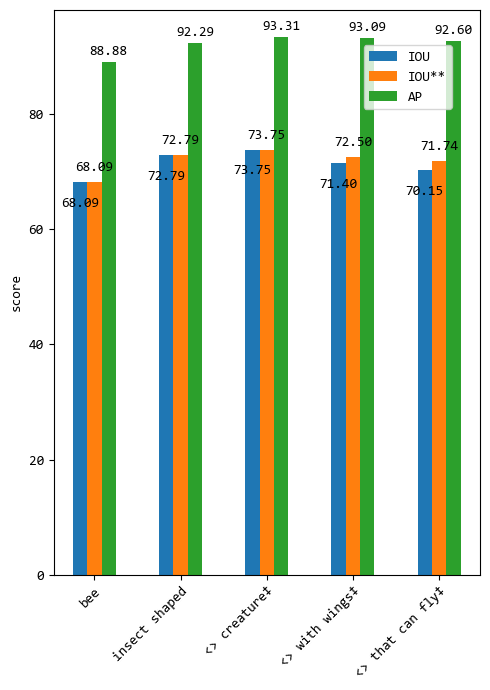

In [86]:
# Visualization
data = np.array(
    [[68.09, 68.09, 88.88], [72.79, 72.79, 92.29], [73.75, 73.75, 93.31], [71.4, 72.50, 93.09], [70.15, 71.74, 92.60]]
)
print(data.shape)

# 提取AP和IOU数据
iou_data = data[:, 0]
iou_data_2 = data[:, 1]
ap_data = data[:, 2]

# 柱状图的位置
x = np.arange(5)

# 绘制柱状图
fig, ax = plt.subplots(figsize=(5, 7))
width = 1  # 柱子的宽度
rects1 = ax.bar(x - width / 6, iou_data, width / 6, label="IOU")
rects2 = ax.bar(x, iou_data_2, width / 6, label="IOU**")
rects3 = ax.bar(x + width / 6, ap_data, width / 6, label="AP")

# 添加标题和标签
ax.set_ylabel("score")

# 旋转横轴标签，竖着从下往上书写
ax.set_xticks(x)
ax.set_xticklabels(["bee", "insect shaped", "<> creature‡", "<> with wings‡", "<> that can fly‡"])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# 在每个柱子的顶部标注数值
# 在每个柱子的顶部标注IOU数值
for rect in rects1:
    height = rect.get_height()
    ax.annotate(
        f"{height:.2f}",  # 控制小数点后的位数
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, -20),  # 调整垂直方向的偏移
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# 在每个柱子的底部标注IOU(t)数值
for rect in rects2:
    height = rect.get_height()
    ax.annotate(
        f"{height:.2f}",
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 15),  # 调整垂直方向的偏移，使其在柱子下方
        textcoords="offset points",
        ha="center",
        va="top",
    )

# 在每个柱子的顶部标注AP数值
for rect in rects3:
    height = rect.get_height()
    ax.annotate(
        f"{height:.2f}",
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )


ax.legend(loc="upper right", bbox_to_anchor=(0.95, 0.95))  # 调整图例的位置

# 显示柱状图
plt.tight_layout()
plt.show()

### Mix Model

#### DSS -> CLIPSeg (as classifier)

In [ ]:
import numpy as np

# 假设你有两个数组：arr1和arr2
arr1 = np.array(dss_part_arr)
arr2 = preds_arr.astype(np.uint8)

# 使用numpy的array_equal函数检查两个数组是否完全相同
if np.array_equal(arr1, arr2):
    print("两个数组完全相同")
else:
    print("两个数组不完全相同")

    # 计算两个数组中相同元素的数量
    same_elements = np.sum(arr1 == arr2)

    # 计算相同元素占总元素的比例
    ratio = same_elements / arr1.size

    print(f"相同元素占总元素的比例为：{ratio}")

两个数组不完全相同
相同元素占总元素的比例为：0.9848484848484849


In [3]:
from myutils.MixModel import getMixModel

mm1 = getMixModel()
getMeanIOU(mm1, t=0.32, pred_idx=0)

Calculating Mean IOU...:   0%|                                              | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:21<12:46,  1.08s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eige

MIOU=73.71%, takes 724.44s in total, 1.00s per image.


(73.7122007986895, 724.4368326663971)

In [4]:
getMeanAP(mm1, pred_idx=0)

Calculating Mean AP...:   0%|                                               | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean AP...:   2%|▉                                     | 18/726 [00:16<10:37,  1.11it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eige

mAP=92.27%, takes 798.52s in total, 1.10s per image.


(92.27376767221233, 798.5194516181946)

In [9]:
# t iterate
mm1 = getMixModel()
t, score, duration = getBestMeanIOU(mm1, pred_idx=0)

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [14:05<00:00,  1.16s/it]

MIOU=73.71% at t=0.32, takes 845.23s in total, 1.16s per image.


#### DSS -> CLIPSeg

In [14]:
# IOU t=0.78
from myutils.MixModel import getMixModel

mm2 = getMixModel(2)
getMeanIOU(mm2, t=0.78, pred_idx=0)

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:09<06:47,  1.74it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [08:01<00:00,  1.51it/s]

MIOU=58.83%, takes 481.64s in total, 0.66s per image.


(58.8325469271657, 481.64116883277893)

In [20]:
mm2 = getMixModel(2)
t, score, duration = getBestMeanIOU(mm2, pred_idx=0)

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [12:29<00:00,  1.03s/it]

MIOU=59.66% at t=0.8200000000000001, takes 749.35s in total, 1.03s per image.


In [21]:
getMeanAP(mm2, pred_idx=0)

Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [12:27<00:00,  1.03s/it]

mAP=81.24%, takes 747.61s in total, 1.03s per image.


(81.24444218706493, 747.6058504581451)

#### CLIPSeg -> DSS

In [30]:
# IOU t=0.78
from myutils.MixModel import getMixModel

mm3 = getMixModel(3)

getMeanIOU(mm3, gs_mode=3, t=0.78, pred_idx=0)

Calculating Mean IOU...:  51%|██████████████████▏                 | 367/726 [07:00<07:26,  1.24s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1632 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  55%|███████████████████▋                | 398/726 [07:30<04:14,  1.29it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1216 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  58%|████████████████████▋               | 418/726 [07:50<05:18,  1.03s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1248 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...:  76%|███████████████████████████▌        | 555/726 [10:59<02:45,  1.03it/s]c:\Users\yit

MIOU=16.99%, takes 869.27s in total, 1.20s per image.


(16.98616673315344, 869.2653331756592)

In [ ]:
from myutils.MixModel import DSSPreds2CLIPSeg

test_img = get_img(1)

gt = get_img(1, _gt=True)
pred_cs = CLIPSeg.segment(test_img)[0]
pred_dss = DSS.segment(test_img)[0]
pred_mix = DSSPreds2CLIPSeg(test_img)

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

# 示例图像，你需要将你的图像放入examples中
examples = [test_img, gt, pred_cs, pred_dss, pred_mix[0]]
titles = ["(a)", "(b)", "(c)", "(d)", "(e)"]

# 创建一行四列的子图
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# 遍历每张子图并显示图像
for i, ax in enumerate(axes):
    ax.axis("off")  # 关闭坐标轴
    ax.text(0.5, 5, f"{titles[i]}", fontsize=18, ha="left", va="bottom")
    ax.imshow(examples[i], cmap="gray")  # 显示图像

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.1)

# 显示图形
plt.show()

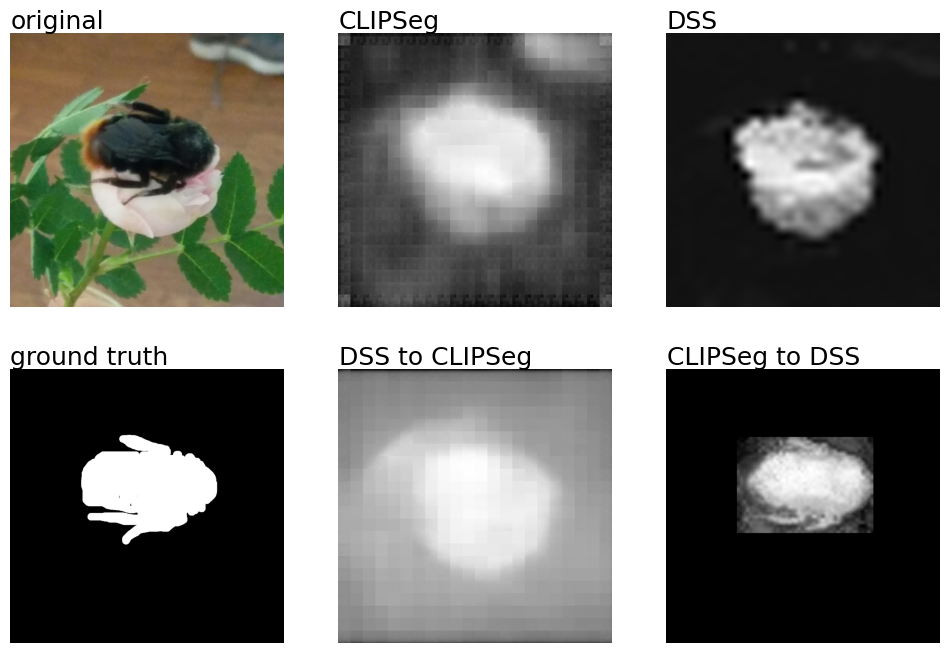

In [ ]:
import matplotlib.pyplot as plt

# 示例图像，你需要将你的图像放入examples中
examples = [test_img, pred_cs, pred_dss, gt, pred_mix[0], pred_mix_2]  # 替换成你的图像列表
titles = ["original", "CLIPSeg", "DSS", "ground truth", "DSS to CLIPSeg", "CLIPSeg to DSS"]

# 创建两行三列的子图
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 遍历每张子图并显示图像
for i, ax in enumerate(axes.ravel()):
    ax.axis("off")  # 关闭坐标轴
    ax.imshow(examples[i], cmap="gray")  # 显示图像
    ax.text(0.5, 0.85, f"{titles[i]}", fontsize=18, ha="left", va="bottom")

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# 显示图形
plt.show()

In [31]:
mm3 = getMixModel(3)
t, score, duration = getBestMeanIOU(mm3, gs_mode=3, pred_idx=0)

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [24:08<00:00,  2.00s/it]

MIOU=58.14% at t=0.14, takes 1448.58s in total, 2.00s per image.


In [7]:
from myutils.MixModel import getMixModel
from myutils.score import getMeanAP

mm3 = getMixModel(3)
getMeanAP(mm3, gs_mode=3, pred_idx=0)

Calculating Mean AP...:  51%|██████████████████▋                  | 367/726 [03:15<03:10,  1.88it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1632 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean AP...:  55%|████████████████████▎                | 398/726 [03:31<02:41,  2.03it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1216 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean AP...:  58%|█████████████████████▎               | 418/726 [03:41<02:28,  2.07it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1248 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean AP...:  76%|████████████████████████████▎        | 555/726 [04:52<01:22,  2.07it/s]c:\Users\yit

mAP=53.04%, takes 384.35s in total, 0.53s per image.


(53.039007008937766, 384.35344529151917)

In [22]:
from myutils.MixModel import CLIPSeg2DSS

test_img = get_img(1)

gt = get_img(1, _gt=True)
pred_cs = CLIPSeg.segment(test_img)[0]
pred_dss = DSS.segment(test_img)[0]
pred_mix = CLIPSeg2DSS(test_img)

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


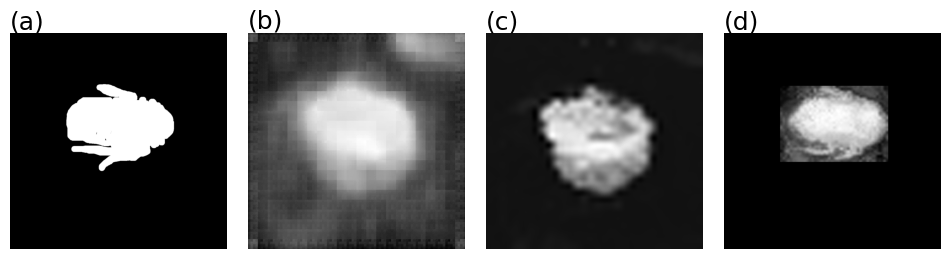

In [ ]:
import matplotlib.pyplot as plt

# 示例图像，你需要将你的图像放入examples中
examples = [gt, pred_cs, pred_dss, pred_mix]
titles = ["(a)", "(b)", "(c)", "(d)"]

# 创建一行四列的子图
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# 遍历每张子图并显示图像
for i, ax in enumerate(axes):
    ax.axis("off")  # 关闭坐标轴
    ax.text(0.5, 5, f"{titles[i]}", fontsize=18, ha="left", va="bottom")
    ax.imshow(examples[i], cmap="gray")  # 显示图像

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.1)

# 显示图形
plt.show()

# Histogram

Text(0.5, 1.0, 'Histogram Comparison')

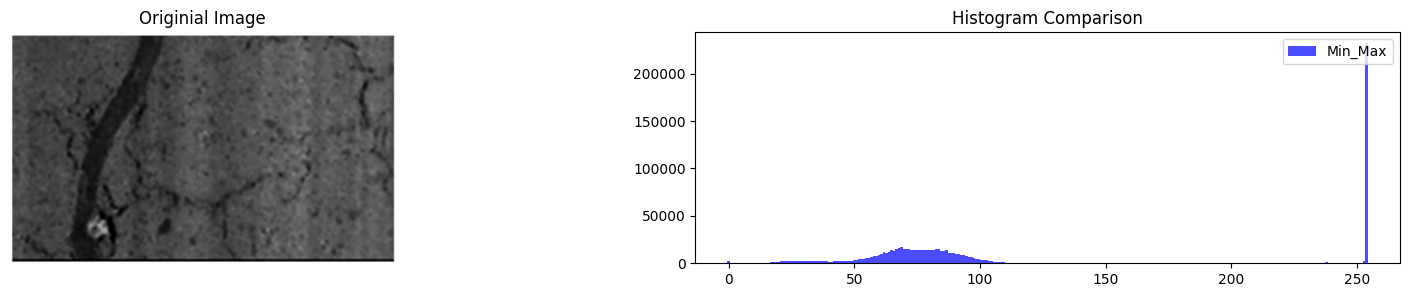

In [36]:
test = get_img(path="C:/Users/yitao/Desktop/", name="test", format="ppm")
test = np.array(test)
# test
test = toGreyscale(torch.from_numpy(test), _gs=True)

fig, axs = plt.subplots(1, 2, figsize=(20, 3))

hist1, bins1 = np.histogram(test.flatten(), bins=256, range=[0, 255])

axs[0].imshow(test, cmap="gray")
axs[0].axis("off")
axs[0].set_title("Originial Image")

width = bins1[1] - bins1[0]
axs[1].bar(bins1[:-1], hist1, width=width, color="blue", alpha=0.7, label="Min_Max")
# axs[1].bar(bins2[:-1], hist2, width=width, color="red", alpha=0.5, label="Sigmoid")
axs[1].legend(loc="upper right")
axs[1].set_title("Histogram Comparison")

Text(0.5, 1.0, 'Histogram Comparison')

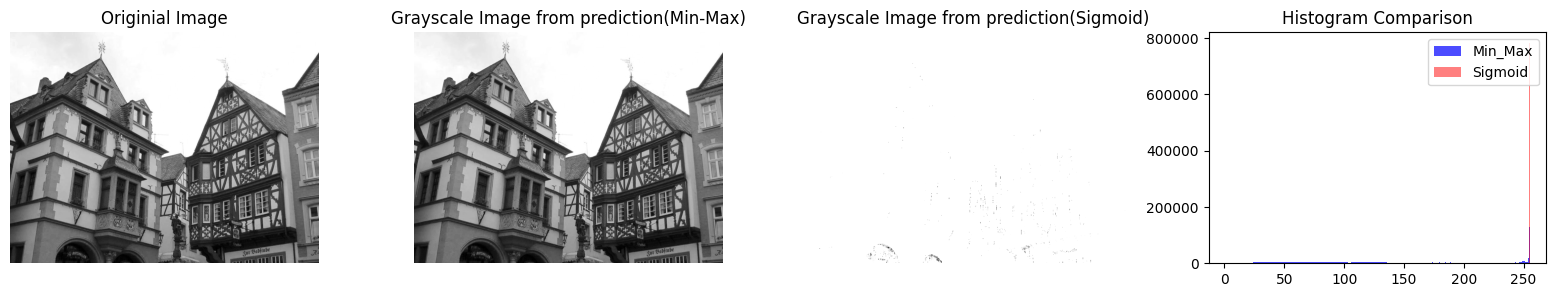

In [42]:
test = get_img(path="C:/Users/yitao/Desktop/", name="Image_processing_pre_otsus_algorithm")
test = np.array(test)

import torch

test = torch.from_numpy(test)

gs_minmax = toGreyscale(test, method=1, _gs=True)
gs_sigmoid = toGreyscale(test, method=2, _gs=True)

# Comparision
import numpy as np
import matplotlib.pyplot as plt

hist1, bins1 = np.histogram(gs_minmax.flatten(), bins=256, range=[0, 256])
hist2, bins2 = np.histogram(gs_sigmoid.flatten(), bins=256, range=[0, 256])

fig, axs = plt.subplots(1, 4, figsize=(20, 3))

axs[0].imshow(test, cmap="gray")
axs[0].axis("off")
axs[0].set_title("Originial Image")

axs[1].imshow(gs_minmax, cmap="gray")
axs[1].axis("off")
axs[1].set_title("Grayscale Image from prediction(Min-Max)")

axs[2].imshow(gs_sigmoid, cmap="gray")
axs[2].axis("off")
axs[2].set_title("Grayscale Image from prediction(Sigmoid)")

width = bins1[1] - bins1[0]
axs[3].bar(bins1[:-1], hist1, width=width, color="blue", alpha=0.7, label="Min_Max")
axs[3].bar(bins2[:-1], hist2, width=width, color="red", alpha=0.5, label="Sigmoid")
axs[3].legend(loc="upper right")
axs[3].set_title("Histogram Comparison")

# DSS Special Cases

In [2]:
from myutils import DSS

Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


In [3]:
# get special_cases_id
special_cases_ids = np.loadtxt("./results/fail_cases.txt", dtype=int)

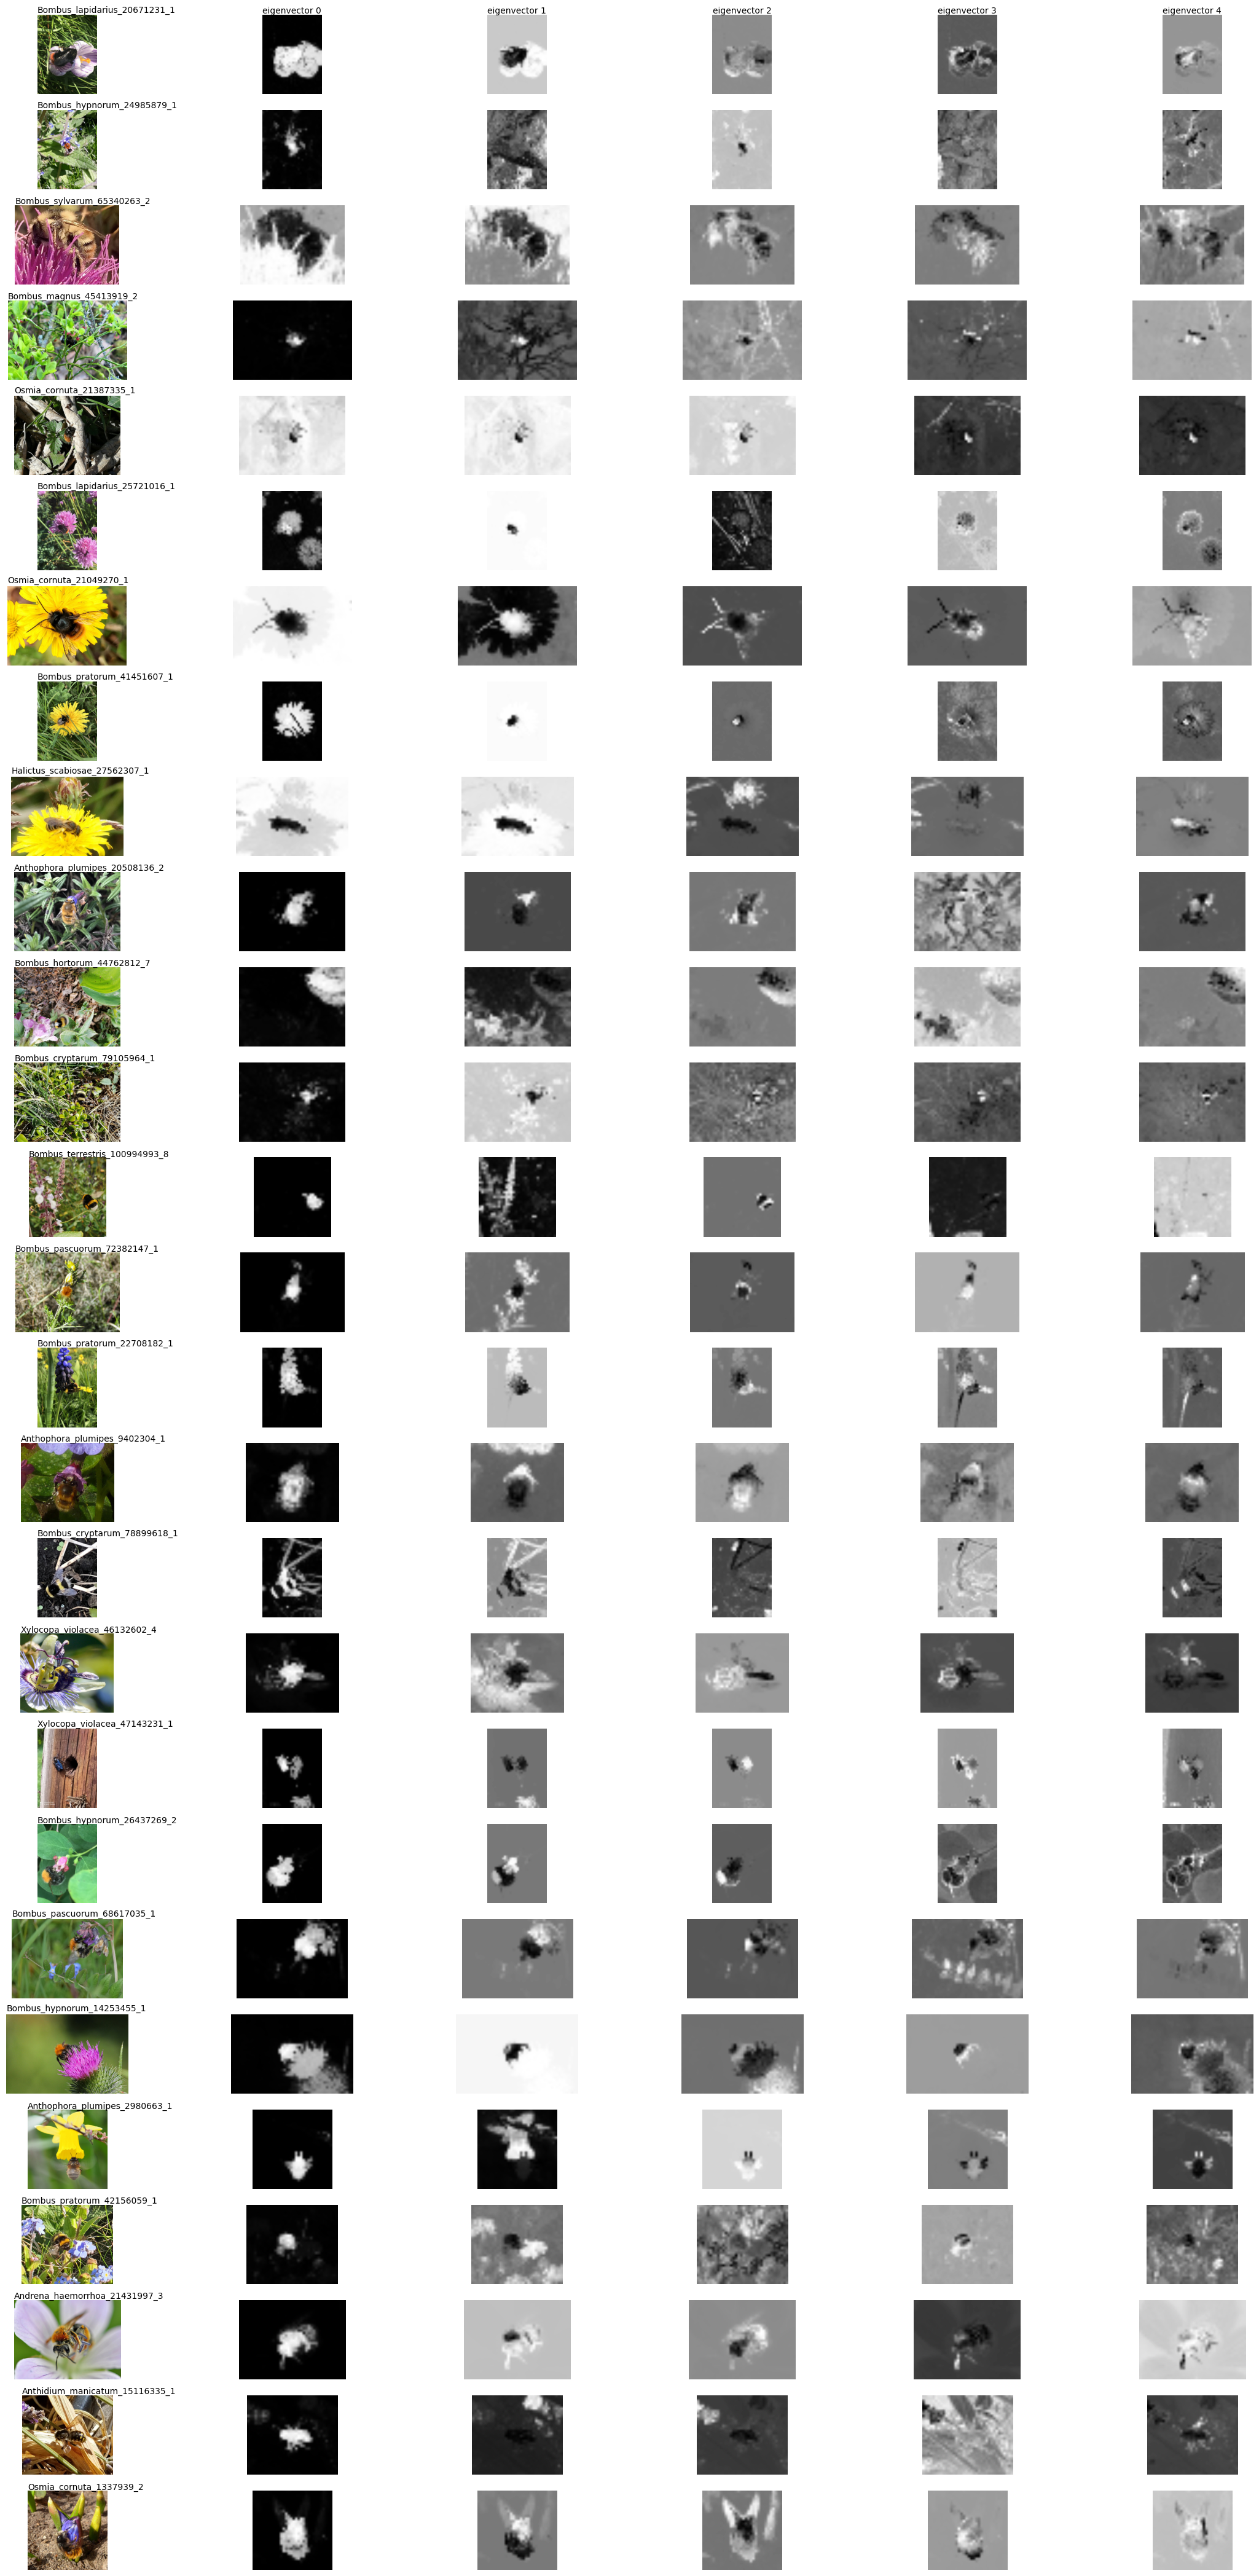

In [11]:
preds = []
input_imgs = []

for id in special_cases_ids:
    input_img = get_img(id)
    input_imgs.append(input_img)
    pred = DSS.segment(input_img)
    preds.append(pred)

fig, ax = plt.subplots(len(input_imgs), len(preds[0]) + 1, figsize=(1 * (len(preds)), 2 * (len(input_imgs))))
fig.subplots_adjust(wspace=0.4)
[a.axis("off") for a in ax.flatten()]
[ax[0][i + 1].text(0, -10, "eigenvector " + str(i)) for i in range(len(preds[0]))]
for j in range(len(preds)):
    ax[j][0].imshow(input_imgs[j])
    ax[j][0].text(0, -15, get_imgName(special_cases_ids[j]))
    [ax[j][i + 1].imshow(preds[j][i], cmap="gray") for i in range(len(preds[j]))]

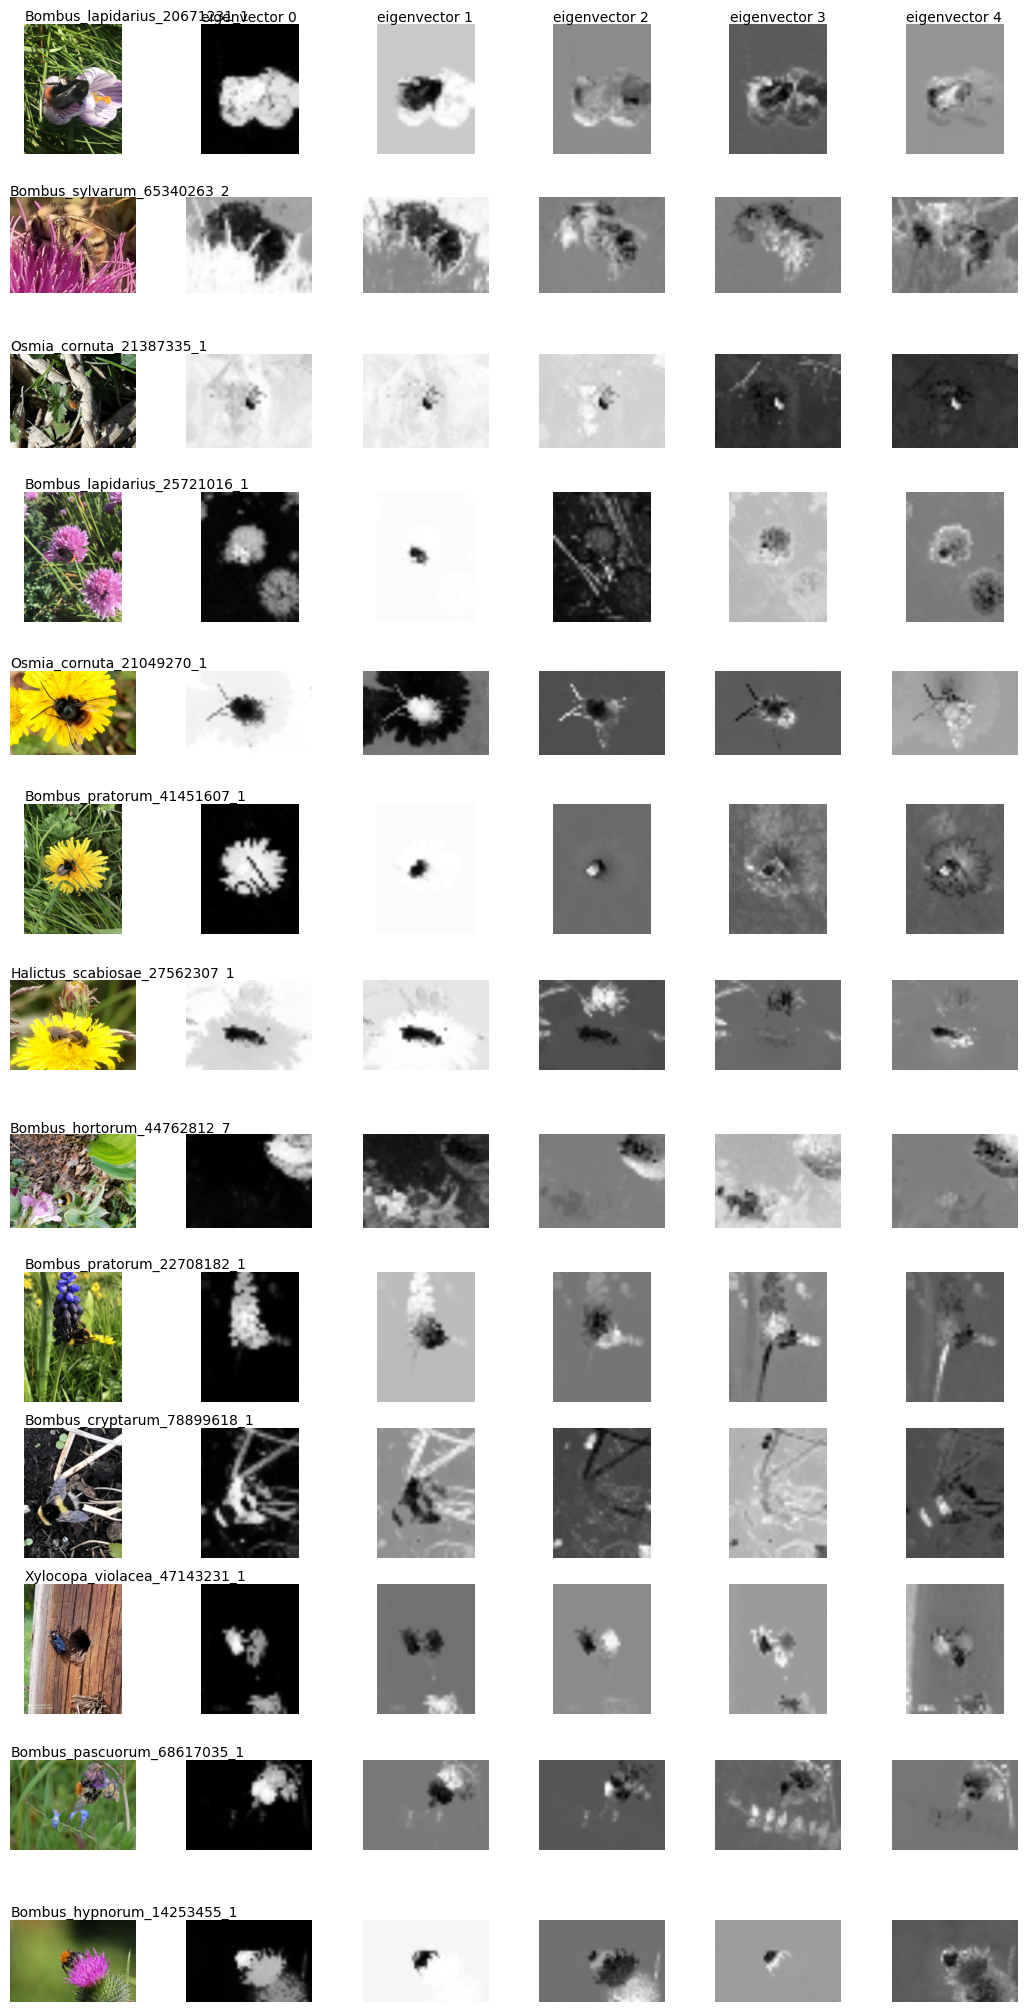

In [12]:
# get special_cases_id
special_cases_ids = np.loadtxt("./results/fail_cases_under50.txt", dtype=int)
preds = []
input_imgs = []

for id in special_cases_ids:
    input_img = get_img(id)
    input_imgs.append(input_img)
    pred = DSS.segment(input_img)
    preds.append(pred)

fig, ax = plt.subplots(len(input_imgs), len(preds[0]) + 1, figsize=(1 * (len(preds)), 2 * (len(input_imgs))))
fig.subplots_adjust(wspace=0.4)
[a.axis("off") for a in ax.flatten()]
[ax[0][i + 1].text(0, -10, "eigenvector " + str(i)) for i in range(len(preds[0]))]
for j in range(len(preds)):
    ax[j][0].imshow(input_imgs[j])
    ax[j][0].text(0, -15, get_imgName(special_cases_ids[j]))
    [ax[j][i + 1].imshow(preds[j][i], cmap="gray") for i in range(len(preds[j]))]

59.51449275016785


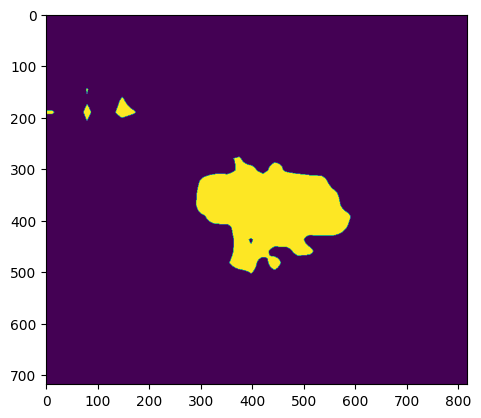

In [8]:
from myutils.DSS import segment
from myutils.score import getBestIOU, getIOU

pred = segment(get_img(special_cases_ids[-2]))[0]
gt = torch.from_numpy(np.array(get_img(special_cases_ids[-2], path=GT_PATH).convert("1"))).long()
t, score = getBestIOU(pred, gt)
print(score)
plt.imshow(toBinary(toGreyscale(pred), t=t))

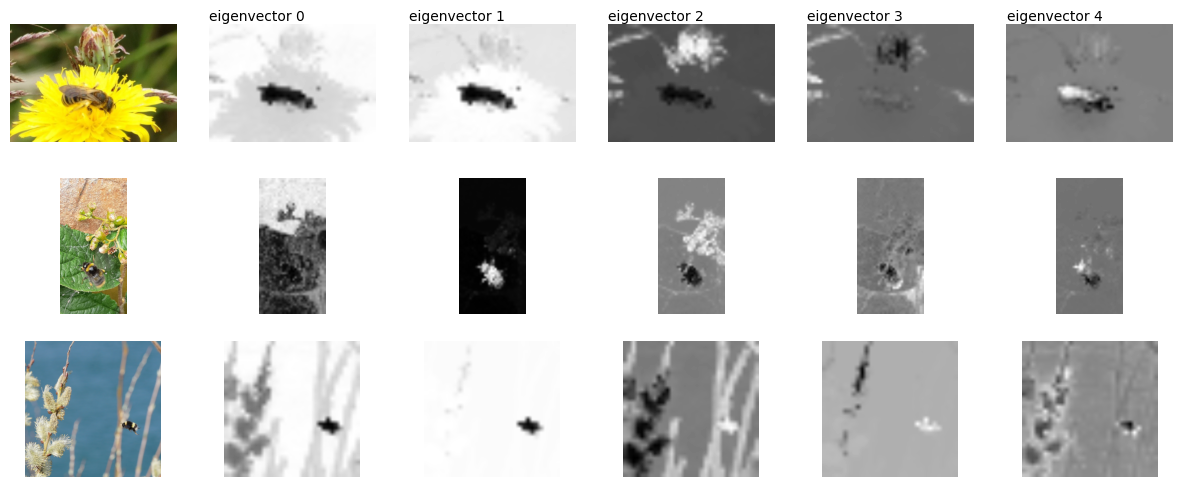

In [82]:
special_cases_id_selected = [210, 410, 213]

preds = []
input_imgs = []

for id in special_cases_id_selected:
    input_img = get_img(id)
    input_imgs.append(input_img)
    pred = DSS.segment(input_img)
    preds.append(pred)

_, ax = plt.subplots(len(input_imgs), len(preds[0]) + 1, figsize=(5 * (len(preds)), 2 * (len(input_imgs))))
[a.axis("off") for a in ax.flatten()]
[ax[0][i + 1].text(0, -10, "eigenvector " + str(i)) for i in range(len(preds[0]))]
for j in range(len(preds)):
    ax[j][0].imshow(input_imgs[j])
    # ax[j][0].text(0, -15, get_imgName(special_cases_id_selected[j]))
    [ax[j][i + 1].imshow(preds[j][i], cmap="gray") for i in range(len(preds[j]))]

In [11]:
result = np.loadtxt("./results/dss_partition.txt")

fail_cases = []
for i in range(result.shape[0]):
    if result[i][1] < 60 and result[i][0] == 0:
        fail_cases.append(i + 1)
    elif result[i][1] < 50:
        fail_cases.append(i + 1)

print(len(fail_cases))

27


In [9]:
result = np.loadtxt("./results/dss_partition.txt")

fail_cases = []
for i in range(result.shape[0]):
    if result[i][1] < 50:
        fail_cases.append(i + 1)

print(len(fail_cases))

13


In [10]:
with open("./results/fail_cases_under50.txt", "w") as f:
    for item in fail_cases:
        # 将数组转换为字符串，元素之间用空格分隔
        line = str(item)
        # 写入文件，并在每行的末尾添加换行符
        f.write(line + "\n")

## Finding Best Prediction Index

In [2]:
from myutils.score import getBestIOUfromPreds
from myutils.DSS import get_segment, segment

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


In [4]:
# Get the best idx for the whole dataset
from tqdm import tqdm


img_names = get_imgNames()
best_idxs = []

for i in tqdm(range(len(img_names)), desc="Calculating IOU...", ncols=100):
    # preds = segment(get_img(name=img_names[i]))
    # gt = get_img(name=img_names[i], path="./dataset/masks/gt/")
    best_idx, result = getBestIOUfromPreds(name=img_names[i])
    best_idxs.append([best_idx, result[1]])

Calculating IOU...: 100%|█████████████████████████████████████████| 726/726 [20:44<00:00,  1.71s/it]


In [58]:
with open("./results/dss_partition.txt", "w") as f:
    for item in best_idxs:
        # 将数组转换为字符串，元素之间用空格分隔
        line = " ".join(map(str, item))
        # 写入文件，并在每行的末尾添加换行符
        f.write(line + "\n")

In [27]:
best_idxs_arr = np.array(best_idxs)

In [20]:
best_idxs_arr.shape

(726, 2)

In [44]:
idxs = []
for i in range(len(best_idxs)):
    if best_idxs[i][1] >= 50:
        idxs.append(best_idxs[i][0])
    else:
        idxs.append(5)

In [49]:
scores = [[] for _ in range(6)]
for i in range(len(best_idxs)):
    score = best_idxs[i][1]
    if score >= 50:
        scores[best_idxs[i][0]].append(score)
    else:
        scores[5].append(score)

In [57]:
for i in range(len(scores)):
    print(f"Eigenvector{i}, max: {np.max(scores[i]):.2f}, min: {np.min(scores[i]):.2f}, mean: {np.mean(scores[i]):.2f}")

Eigenvector0, max: 91.74, min: 51.78, mean: 79.17
Eigenvector1, max: 85.31, min: 60.34, mean: 71.69
Eigenvector2, max: 80.08, min: 59.34, mean: 70.04
Eigenvector3, max: 64.84, min: 55.63, mean: 60.23
Eigenvector4, max: 57.31, min: 57.31, mean: 57.31
Eigenvector5, max: 49.99, min: 18.49, mean: 39.38


In [45]:
unique_elements, counts = np.unique(np.array(idxs), return_counts=True)

# 打印结果
for element, count in zip(unique_elements, counts):
    print(f"元素: {element}, 数量: {count}")

元素: 0, 数量: 686
元素: 1, 数量: 19
元素: 2, 数量: 5
元素: 3, 数量: 2
元素: 4, 数量: 1
元素: 5, 数量: 13


In [46]:
from matplotlib import font_manager as fm
from matplotlib import cm
% matplotlib inline
plt.style.use('ggplot')

UsageError: Line magic function `%` not found.


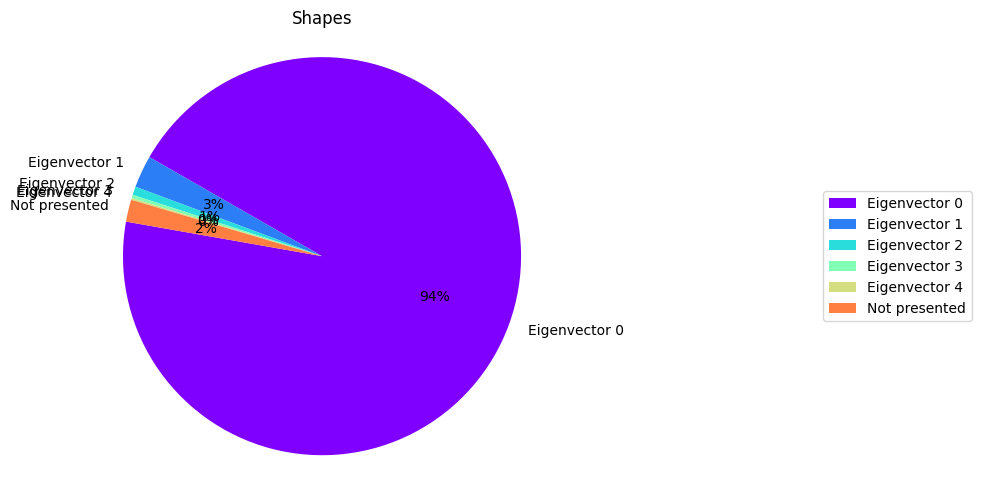

In [47]:
# 原始数据
shapes = [
    "Eigenvector 0",
    "Eigenvector 1",
    "Eigenvector 2",
    "Eigenvector 3",
    "Eigenvector 4",
    "Not presented",
]
values = [686, 19, 5, 2, 1, 13]

s = pd.Series(values, index=shapes)
s

labels = s.index
sizes = s.values
# explode = (0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)  # only "explode" the 1st slice

fig, axes = plt.subplots(figsize=(10, 5), ncols=2)  # 设置绘图区域大小
ax1, ax2 = axes.ravel()

colors = cm.rainbow(np.arange(len(sizes)) / len(sizes))  # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(
    sizes, labels=labels, autopct="%1.0f%%", shadow=False, startangle=170, colors=colors
)

ax1.axis("equal")

# 重新设置字体大小
proptease = fm.FontProperties()
proptease.set_size("medium")
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title("Shapes", loc="center")

# ax2 只显示图例（legend）
ax2.axis("off")
ax2.legend(patches, labels, loc="center right")

plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig("Demo_project_set_legend_good.jpg")
plt.show()

## CLIPSeg + DSS

In [24]:
from myutils import CLIPSeg, DSS

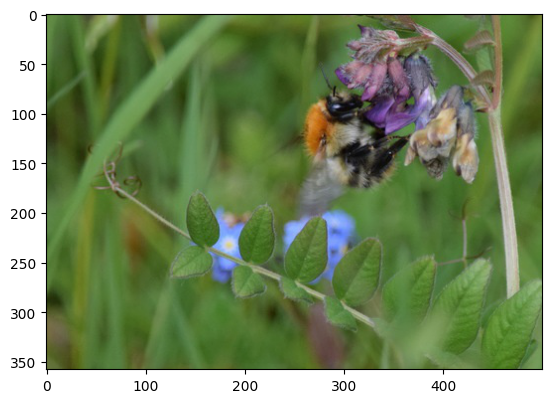

In [29]:
special_cases_ids = np.loadtxt("./results/fail_cases_under50.txt", dtype=int)

test_img = get_img(special_cases_ids[-2])
plt.imshow(test_img)

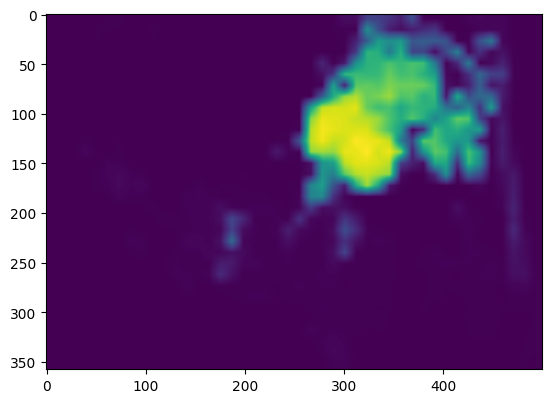

In [30]:
pred_dss = DSS.segment(test_img)[0]
plt.imshow(pred_dss)

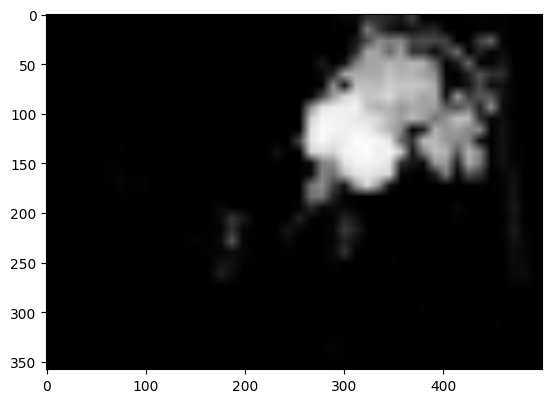

In [31]:
pred_dss_gs = toGreyscale(pred_dss).unsqueeze(0)
three_channel_tensor = torch.cat([pred_dss_gs] * 3, dim=0)
pil_image = transforms.ToPILImage()(three_channel_tensor)
plt.imshow(pil_image)

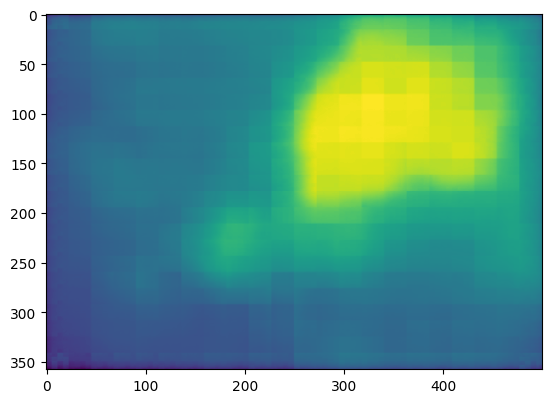

In [35]:
pred_dss_clipseg = CLIPSeg.segment(pil_image, ["bee", "insect shaped"])
plt.imshow(pred_dss_clipseg[0])

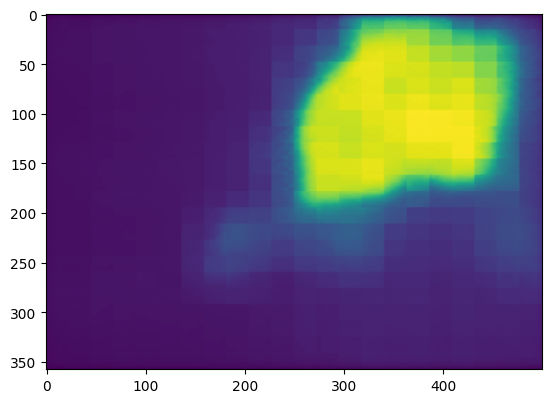

In [33]:
pred_comb = toGreyscale(pred_dss_clipseg[1], 2)
plt.imshow(pred_comb)

In [34]:
from myutils.score import getBestIOU

# gt = get_img(special_cases_ids[2], path="./dataset/masks/gt/")
gt = torch.from_numpy(np.array(get_img(special_cases_ids[-2], path="./dataset/masks/gt/").convert("1"))).long()

t, score = getBestIOU(pred=pred_dss_clipseg[1], gt=gt)
print(f"best result {score} at t = {t}")

best result 28.777697682380676 at t = 0.92


## Compare

In [ ]:
import pandas as pd

df = pd.read_csv("./results/scores.csv")
# 根据IOU和AP列的值对DataFrame进行排序（升序）
df_sorted = df.sort_values(by=["IOU", "AP"])

# 初始化结果列表和一个集合用于存储已经选择的不同filename
result = []
selected_filenames = set()

# 遍历排序后的DataFrame，选择IOU和AP值最低且filename不相同的5条数据
for index, row in df_sorted.iterrows():
    if row["filename"] not in selected_filenames:
        result.append(row)
        selected_filenames.add(row["filename"])
        if len(result) == 5:
            break

# 将结果转换为DataFrame
result_df = pd.DataFrame(result)
showcases_names = result_df["filename"].values

# 打印结果
print(showcases_names)

import matplotlib.pyplot as plt
from myutils.img_loader import get_img_by_name
from torchmetrics.classification import BinaryJaccardIndex, BinaryAveragePrecision

showcases = []
toTensor = transforms.ToTensor()
scores = []
metric_biJ = BinaryJaccardIndex()
metric_biAP = BinaryAveragePrecision(thresholds=None)

for name in showcases_names:
    showcase = []
    score = []
    showcase.append(get_img_by_name(name))
    showcase.append(toTensor(get_img_by_name(name, GT_PATH)).squeeze(0))
    showcase.append(toTensor(get_img_by_name(name, CLIP_PATH + "0.8/", "png")).squeeze(0))
    showcase.append(toTensor(get_img_by_name(name, DSS_PATH + "0/0.28/", "png")).squeeze(0))
    score.append(str(round(metric_biJ(showcase[2], showcase[1].long()).item() * 100, 2)) + "%")
    score.append(str(round(metric_biAP(showcase[2], showcase[1].long()).item() * 100, 2)) + "%")
    score.append(str(round(metric_biJ(showcase[3], showcase[1].long()).item() * 100, 2)) + "%")
    score.append(str(round(metric_biAP(showcase[3], showcase[1].long()).item() * 100, 2)) + "%")

    showcases.append(showcase)
    scores.append(score)

_, ax = plt.subplots(len(showcases), len(showcases[0]), figsize=(30, 30))
[a.axis("off") for a in ax.flatten()]
for j in range(len(showcases)):
    [ax[j][i].imshow(showcases[j][i], cmap="summer") for i in range(4)]
    ax[j][2].text(0, -60, "CLIPSEG:")
    ax[j][2].text(0, -35, "IOU score:" + scores[j][0])
    ax[j][2].text(0, -10, "bAP score:" + scores[j][1])
    ax[j][3].text(0, -60, "DEEP SPECTRAL SEG:")
    ax[j][3].text(0, -35, "IOU score:" + scores[j][2])
    ax[j][3].text(0, -10, "bAP score:" + scores[j][3])

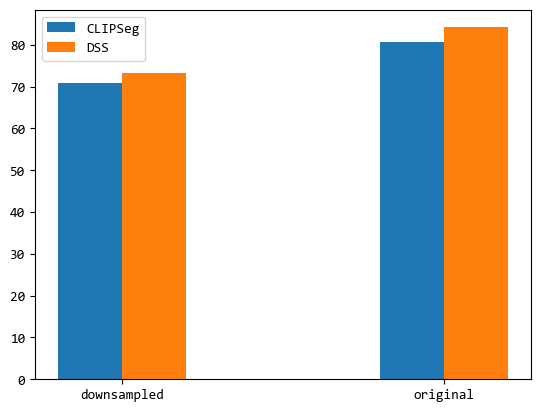

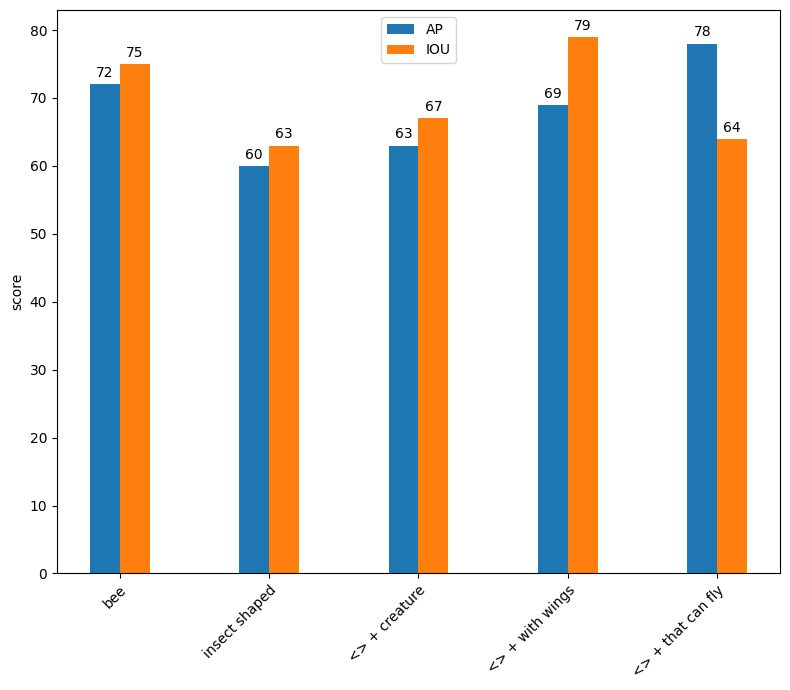

In [20]:
# 生成随机数据
np.random.seed(0)
data = np.random.randint(60, 81, size=(5, 2))  # 生成5行2列的随机整数数据

# 提取AP和IOU数据
ap_data = data[:, 0]
iou_data = data[:, 1]

# 柱状图的位置
x = np.arange(5)  # 五列数据

# 绘制柱状图
fig, ax = plt.subplots(figsize=(8, 7))  # 调整图像大小
width = 0.2  # 柱子的宽度
rects1 = ax.bar(x - width / 2, ap_data, width, label="AP")
rects2 = ax.bar(x + width / 2, iou_data, width, label="IOU")

# 添加标题和标签
ax.set_ylabel("score")

# 旋转横轴标签，竖着从下往上书写
ax.set_xticks(x)
ax.set_xticklabels(["bee", "insect shaped", "<> + creature", "<> + with wings", "<> + that can fly"])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# 在每个柱子的顶部标注数值
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(
        f"{height}",
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

ax.legend(loc="upper center")  # 图例显示在右上角

# 显示柱状图
plt.tight_layout()
plt.show()

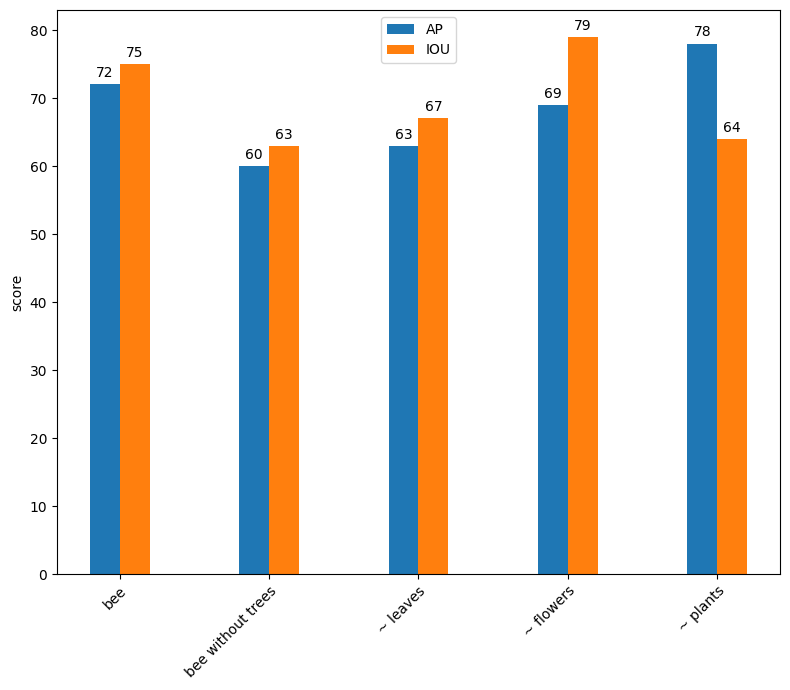

In [30]:
# 生成随机数据
np.random.seed(0)
data = np.random.randint(60, 81, size=(5, 2))  # 生成5行2列的随机整数数据

# 提取AP和IOU数据
ap_data = data[:, 0]
iou_data = data[:, 1]

# 柱状图的位置
x = np.arange(5)  # 五列数据

# 绘制柱状图
fig, ax = plt.subplots(figsize=(8, 7))  # 调整图像大小
width = 0.2  # 柱子的宽度
rects1 = ax.bar(x - width / 2, ap_data, width, label="AP")
rects2 = ax.bar(x + width / 2, iou_data, width, label="IOU")

# 添加标题和标签
ax.set_ylabel("score")

# 旋转横轴标签，竖着从下往上书写
ax.set_xticks(x)
ax.set_xticklabels(["bee", "bee without trees", "~ leaves", "~ flowers", "~ plants"])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# 在每个柱子的顶部标注数值
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(
        f"{height}",
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

ax.legend(loc="upper center")  # 图例显示在右上角

# 显示柱状图
plt.tight_layout()
plt.show()

## Clustering Similarity

In [36]:
import random
import torch
import torch.nn.functional as F

file_path = "./results/dss_partition.txt"  # 替换为你的文件路径
data = []
with open(file_path, "r") as file:
    for idx, line in enumerate(file):
        parts = line.strip().split()  # 假设每行以空格分隔，可以根据实际情况调整分隔符
        if len(parts) == 2:
            index, best_eig, score = int(idx), int(parts[0]), float(parts[1])
            data.append((index, best_eig, score))

# 步骤2：根据分数对数据进行排序，并选择前20个条目
sorted_data = sorted(data, key=lambda x: x[2], reverse=True)
top_20_data = sorted_data[:100]
top_20_data = random.sample(sorted_data[:500], 50)
bottom_5_data = sorted_data[:-5]
# for item in top_20_data:
#     index, best_sequence, score = item
# print(f"Index: {index}, Best Sequence: {best_sequence}, Score: {score}")

In [38]:
from myutils.loaders import get_imgNames

img_names = get_imgNames()
similarity_mat_intra_comp = np.zeros((len(img_names), 5))
# 计算特殊Tensor与每行中其他Tensor的余弦相似度

for i in range(len(img_names)):
    # get all predictions of image i
    row_lists = [get_img(i + 1, path="./dataset/preds/dss/" + str(j) + "/", format="pt").flatten() for j in range(5)]

    for j in range(5):
        sim = F.cosine_similarity(row_lists[data[i][1]], row_lists[j], dim=0)
        similarity_mat_intra_comp[i][j] = sim

print(similarity_mat_intra_comp.shape)

(726, 5)


In [39]:
similarity_mat_inter = np.zeros((len(top_20_data), len(top_20_data)))
# 计算特殊Tensor与每行中其他Tensor的余弦相似度

best_preds = [
    torch.nn.functional.interpolate(
        get_img(top_20_data[i][0] + 1, path="./dataset/preds/dss/" + str(top_20_data[i][1]) + "/", format="pt")
        .unsqueeze(0)
        .unsqueeze(1),
        size=128,
        mode="bilinear",
    ).flatten()
    for i in range(len(top_20_data))
]

for i in range(len(top_20_data)):
    for j in range(i, len(top_20_data)):
        sim = F.cosine_similarity(best_preds[i], best_preds[j], dim=0)
        # print(sim)
        similarity_mat_inter[i][j] = sim

print(similarity_mat_inter.shape)

(50, 50)


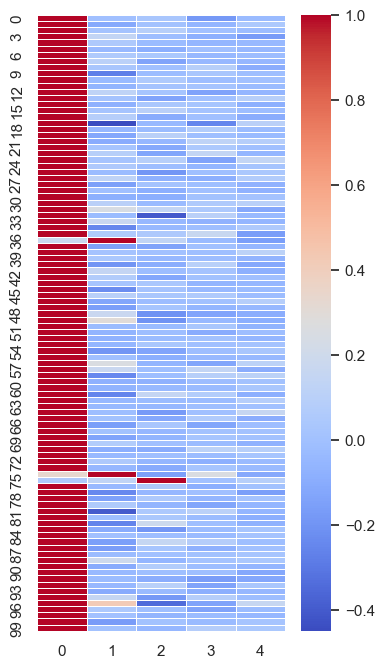

In [41]:
import seaborn as sns

sns.set(style="white")  # 设置图的样式

# 使用heatmap绘制相关图
plt.figure(figsize=(4, 8))  # 设置图的大小
sns.heatmap(similarity_mat_intra_comp[:100], annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 显示图
plt.show()

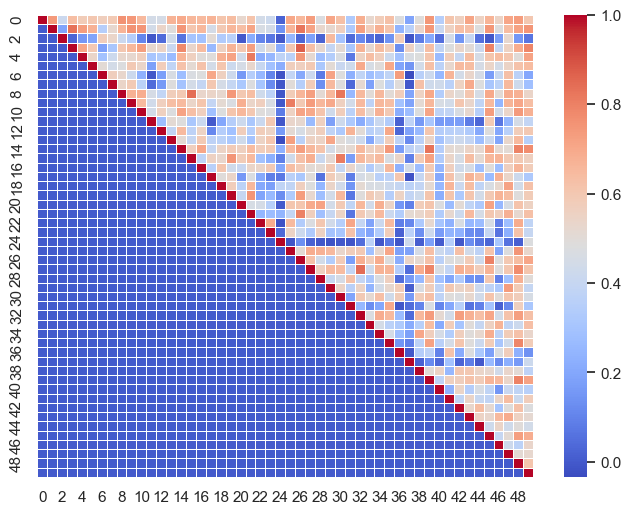

In [42]:
import seaborn as sns

sns.set(style="white")  # 设置图的样式

# 使用heatmap绘制相关图
plt.figure(figsize=(8, 6))  # 设置图的大小
sns.heatmap(similarity_mat_inter, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 显示图
plt.show()

## DSS Discussion

In [104]:
# 定义文件路径
file_path = "./results/dss_partition.txt"  # 替换成你的文件路径

# 初始化变量来存储最大和最小的数据及其对应的行号和 prompt_id
max_values = []
min_values = []

# 初始化变量来存储数据和行号
data = []
line_numbers = []

# 读取文件并处理数据
with open(file_path, "r") as file:
    lines = file.readlines()
    for line_number, line in enumerate(lines):
        parts = line.strip().split(" ")
        if len(parts) == 2:
            prompt_id, val = parts
            data.append((int(prompt_id), float(val)))
            line_numbers.append(line_number)

# 根据 val 值排序数据
sorted_data = sorted(zip(data, line_numbers), key=lambda x: x[0][1])

# 找到最大的 3 个数据
max_data = sorted_data[-3:]

# 找到最小的 3 个数据
min_data = sorted_data[:3]

# 提取行号和 prompt_id
max_indices = [item[1] for item in max_data]
max_prompt_ids = [item[0][0] for item in max_data]
min_indices = [item[1] for item in min_data]
min_prompt_ids = [item[0][0] for item in min_data]

# 打印结果或进行其他操作
print("最大的 3 个数据的行号：", max_indices)
print("最大的 3 个数据的prompt_id：", max_prompt_ids)
print("最小的 3 个数据的行号：", min_indices)
print("最小的 3 个数据的prompt_id：", min_prompt_ids)

最大的 3 个数据的行号： [65, 351, 481]
最大的 3 个数据的prompt_id： [0, 0, 0]
最小的 3 个数据的行号： [247, 209, 103]
最小的 3 个数据的prompt_id： [4, 4, 4]


In [108]:
arr1 = max_indices + min_indices
arr2 = max_prompt_ids + min_prompt_ids

In [109]:
_, _, dss = DSS.get_segment()

preds = [dss(get_img(arr1[i]))[arr2[i]] for i in range(len(arr1))]
oris = [get_img(arr1[i]) for i in range(len(arr1))]

In [153]:
preds = [toBinary(toGreyscale(pred), 0.32) for pred in preds]

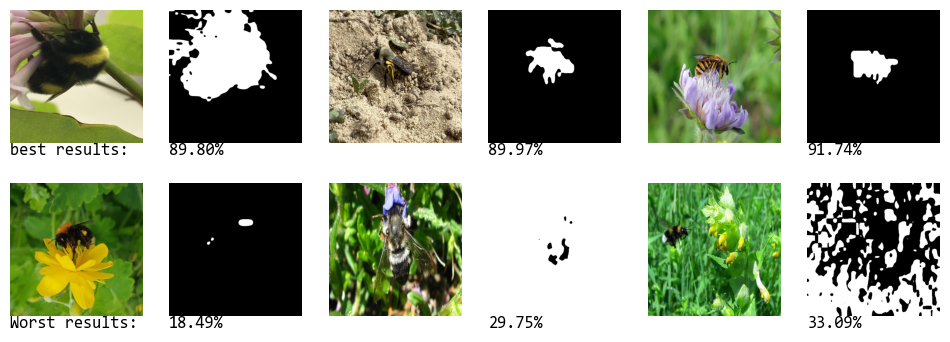

In [154]:
import matplotlib.pyplot as plt

# 假设 preds 是存储预测的数组，oris 是存储原始图像的数组

# 创建一个两行六列的子图
fig, axes = plt.subplots(2, 6, figsize=(12, 4.5))


for i in range(3):
    ax1_o = axes[0, i * 2]  # 第一行显示预测图像
    ax1_o.imshow(oris[i], extent=[0, 100, 0, 100])
    ax1_o.axis("off")  # 关闭坐标轴
    ax1_p = axes[0, i * 2 + 1]
    ax1_p.imshow(preds[i], cmap="gray", extent=[0, 100, 0, 100])
    ax1_p.axis("off")  # 关闭坐标轴

    ax2_o = axes[1, i * 2]  # 第一行显示预测图像
    ax2_o.imshow(oris[i + 3], extent=[0, 100, 0, 100])
    ax2_o.axis("off")  # 关闭坐标轴
    ax2_p = axes[1, i * 2 + 1]
    ax2_p.imshow(preds[i + 3], cmap="gray", extent=[0, 100, 0, 100])
    ax2_p.axis("off")  # 关闭坐标轴

axes[0, 0].text(0, 0, "best results:", rotation=0, va="top", fontsize=12, color="black")
axes[1, 0].text(0, 0, "Worst results:", rotation=0, va="top", fontsize=12, color="black")

axes[0, 1].text(0, 0, "89.80%", rotation=0, va="top", fontsize=12, color="black")
axes[0, 3].text(0, 0, "89.97%", rotation=0, va="top", fontsize=12, color="black")
axes[0, 5].text(0, 0, "91.74%", rotation=0, va="top", fontsize=12, color="black")
axes[1, 1].text(0, 0, "18.49%", rotation=0, va="top", fontsize=12, color="black")
axes[1, 3].text(0, 0, "29.75%", rotation=0, va="top", fontsize=12, color="black")
axes[1, 5].text(0, 0, "33.09%", rotation=0, va="top", fontsize=12, color="black")

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.2, hspace=0)

# 显示图像
plt.show()

### Partitions Analysis

In [34]:
from myutils.score import getIOUPart, getAPPart
from myutils import CLIPSeg, DSS

_, _, dss = DSS.get_segment()
_, clipseg = CLIPSeg.get_segment(["insect shaped"])

In [2]:
preds_clipseg = getIOUPart(clipseg, t=0.78, pred_idx=0)

Calculating Mean IOU...:   0%|                                              | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [00:45<00:00, 16.12it/s]


In [35]:
preds_clipseg_ap = getAPPart(clipseg, pred_idx=0)

Calculating Mean AP...:   0%|                                               | 0/726 [00:00<?, ?it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [01:58<00:00,  6.13it/s]


In [30]:
def count_values_in_ranges(input_array):
    # 初始化一个长度为10的数组，用于存储每个范围内的数量
    counts = [0] * 10

    # 计算每个范围内的数量
    for value in input_array:
        if 0 <= value <= 100:
            index = int(value // 10)
            counts[index] += 1

    return counts

In [31]:
# 调用函数并打印输出
result_clipseg = count_values_in_ranges(preds_clipseg)
print(result_clipseg)

[0, 3, 3, 5, 16, 45, 144, 327, 183, 0]


In [10]:
preds_dss = getIOUPart(dss, t=0.32, pred_idx=0)

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:08<05:41,  2.08it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [06:15<00:00,  1.93it/s]


In [36]:
preds_dss_ap = getAPPart(dss, pred_idx=0)

Calculating Mean AP...:   2%|▉                                     | 18/726 [00:14<07:30,  1.57it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean AP...: 100%|█████████████████████████████████████| 726/726 [08:30<00:00,  1.42it/s]


In [32]:
result_dss = count_values_in_ranges(preds_dss)
print(result_dss)

[23, 10, 2, 7, 5, 38, 88, 286, 267, 0]


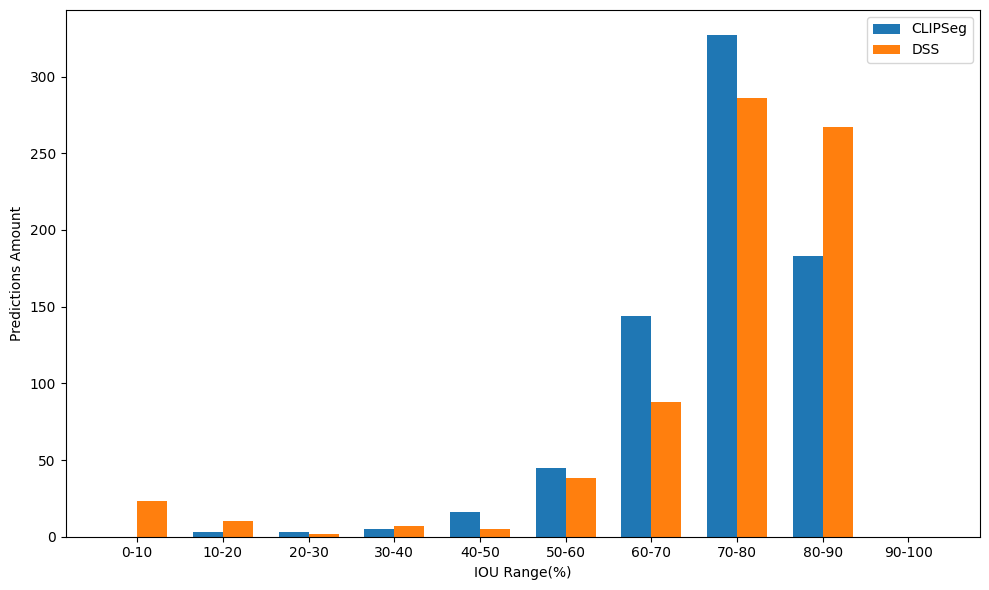

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 两组数据（长度为十的数组）
iou_range = np.arange(10)  # IOU区间

# 柱状图的宽度
bar_width = 0.35

# 创建图例标签
legend_labels = ["CLIPSeg", "DSS"]

# 创建柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制第一组数据
rects1 = ax.bar(iou_range - bar_width / 2, result_clipseg, bar_width, label=legend_labels[0])

# 绘制第二组数据
rects2 = ax.bar(iou_range + bar_width / 2, result_dss, bar_width, label=legend_labels[1])

ax.set_xlabel("IOU Range(%)")
ax.set_ylabel("Predictions Amount")

# 设置横轴标签
ax.set_xticks(iou_range)
ax.set_xticklabels([f"{i*10}-{(i+1)*10}" for i in iou_range])

# 添加图例
ax.legend()

# 显示柱状图
plt.tight_layout()
plt.show()

### IOU X AP

In [1]:
# 打开txt文件以读取数据
with open("./dataset/metafiles/classes/image_class_labels.txt", "r") as file:
    lines = file.readlines()

# 初始化一个空数组来存储text_b的值
class_arr = []

# 遍历文件的每一行并提取text_b的值
for line in lines:
    # 假设每一行都由空格分隔text_a和text_b，您可以根据实际情况修改分隔符
    parts = line.strip().split(" ")
    if len(parts) >= 2:
        text_b = int(parts[1])  # 提取text_b的值
        class_arr.append(text_b)

# 打印或使用class_arr中的数据
print(class_arr)

[1, 2, 3, 4, 5, 4, 6, 7, 8, 1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 15, 18, 19, 5, 11, 3, 20, 1, 20, 7, 17, 21, 22, 11, 13, 23, 8, 5, 24, 21, 5, 9, 17, 14, 1, 7, 21, 10, 19, 19, 18, 18, 2, 19, 12, 10, 3, 10, 18, 21, 10, 5, 5, 2, 24, 21, 3, 24, 9, 10, 9, 2, 5, 3, 4, 11, 14, 18, 24, 17, 16, 24, 3, 25, 9, 20, 5, 24, 19, 16, 1, 19, 13, 14, 2, 17, 8, 23, 17, 12, 6, 2, 5, 20, 12, 13, 20, 21, 16, 18, 21, 3, 19, 21, 23, 13, 24, 11, 19, 2, 25, 6, 20, 22, 19, 24, 24, 9, 8, 2, 9, 15, 13, 9, 9, 12, 23, 16, 2, 23, 3, 2, 20, 23, 13, 5, 24, 12, 20, 17, 4, 15, 23, 6, 25, 19, 9, 22, 1, 7, 6, 22, 5, 24, 7, 23, 3, 22, 12, 20, 21, 12, 3, 16, 25, 14, 4, 4, 6, 10, 22, 2, 15, 12, 4, 17, 13, 25, 3, 14, 15, 9, 16, 5, 14, 18, 23, 3, 4, 25, 3, 25, 11, 1, 6, 5, 19, 18, 25, 18, 15, 12, 15, 21, 24, 23, 11, 18, 4, 6, 21, 20, 5, 5, 16, 15, 7, 4, 1, 1, 23, 17, 3, 16, 13, 17, 4, 17, 14, 2, 17, 23, 7, 6, 13, 3, 10, 11, 20, 4, 6, 18, 12, 8, 2, 9, 22, 6, 1, 9, 25, 6, 19, 12, 18, 13, 12, 20, 6, 16, 13, 25, 15, 4, 2, 3, 13, 1

In [2]:
import numpy as np

dtypes = {"names": ("a", "b", "c"), "formats": (int, float, float)}

arr = np.loadtxt("./results/clipseg_iouap.txt", delimiter=",", dtype=dtypes)
arr = np.loadtxt("./results/clipseg_iouap.txt", delimiter=",")
arr.shape

(726, 3)

C:\Users\yitao\AppData\Local\Temp\ipykernel_24656\1259215816.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(legend_labels, loc='lower right', title='Classes', labels=legend_labels)
C:\Users\yitao\AppData\Local\Temp\ipykernel_24656\1259215816.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[i].set_color(legend_colors[i])


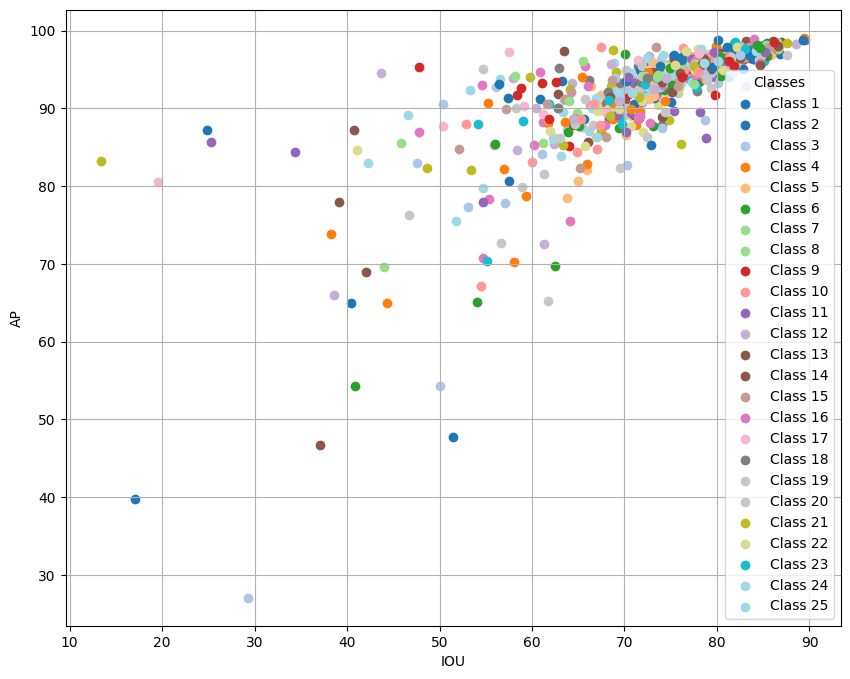

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# 获取不同类别的颜色映射
unique_classes = np.unique(arr[:, 0])
num_classes = len(unique_classes)
cmap = plt.get_cmap("tab20", num_classes)

# 创建一个图形对象
plt.figure(figsize=(10, 8))

# 遍历数组中的每个坐标点并绘制
for i in range(len(arr)):
    c, x, y = arr[i]
    class_label = int(c)

    color = cmap(class_label - 1)  # 从颜色映射中选择颜色，类别从1开始
    plt.scatter(x, y, color=color)

# 设置图形标题和标签
plt.xlabel("IOU")
plt.ylabel("AP")

# 手动设置图例
legend_labels = [f"Class {int(c)}" for c in unique_classes]
legend_colors = [cmap(i) for i in range(num_classes)]
legend = plt.legend(legend_labels, loc="lower right", title="Classes", labels=legend_labels)
for i in range(num_classes):
    legend.legendHandles[i].set_color(legend_colors[i])

# 显示图形
plt.grid(True)
plt.show()

C:\Users\yitao\AppData\Local\Temp\ipykernel_24656\1314304699.py:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(legend_labels, loc='lower right', title='Classes', labels=legend_labels)
C:\Users\yitao\AppData\Local\Temp\ipykernel_24656\1314304699.py:28: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[i].set_color(legend_colors[i])


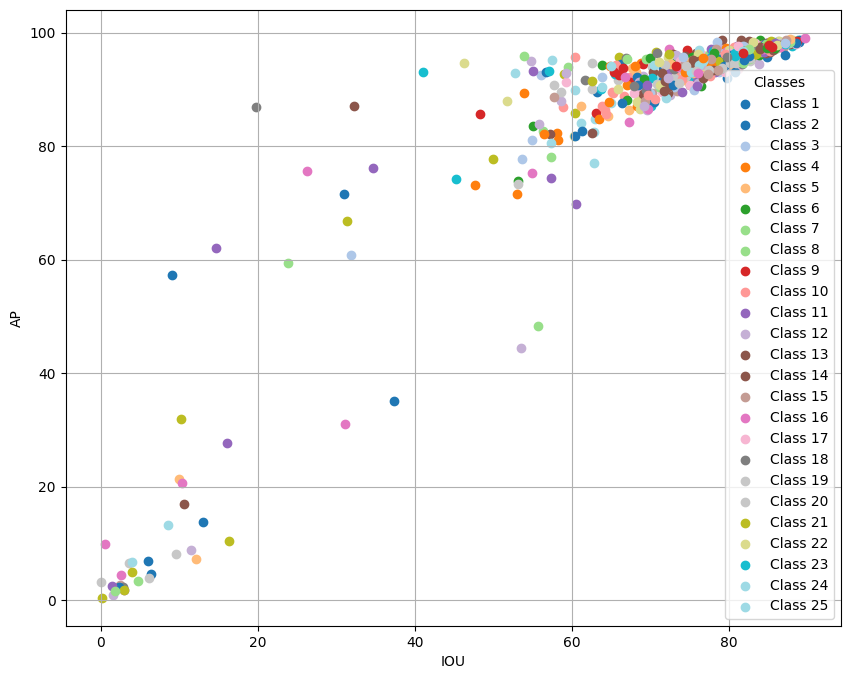

In [73]:
arr = np.loadtxt("./results/dss_iouap.txt", delimiter=",")

# 获取不同类别的颜色映射
unique_classes = np.unique(arr[:, 0])
num_classes = len(unique_classes)
cmap = plt.get_cmap("tab20", num_classes)

# 创建一个图形对象
plt.figure(figsize=(10, 8))

# 遍历数组中的每个坐标点并绘制
for i in range(len(arr)):
    c, x, y = arr[i]
    class_label = int(c)

    color = cmap(class_label - 1)  # 从颜色映射中选择颜色，类别从1开始
    plt.scatter(x, y, color=color)

# 设置图形标题和标签
plt.xlabel("IOU")
plt.ylabel("AP")

# 手动设置图例
legend_labels = [f"Class {int(c)}" for c in unique_classes]
legend_colors = [cmap(i) for i in range(num_classes)]
legend = plt.legend(legend_labels, loc="lower right", title="Classes", labels=legend_labels)
for i in range(num_classes):
    legend.legendHandles[i].set_color(legend_colors[i])

# 显示图形
plt.grid(True)
plt.show()

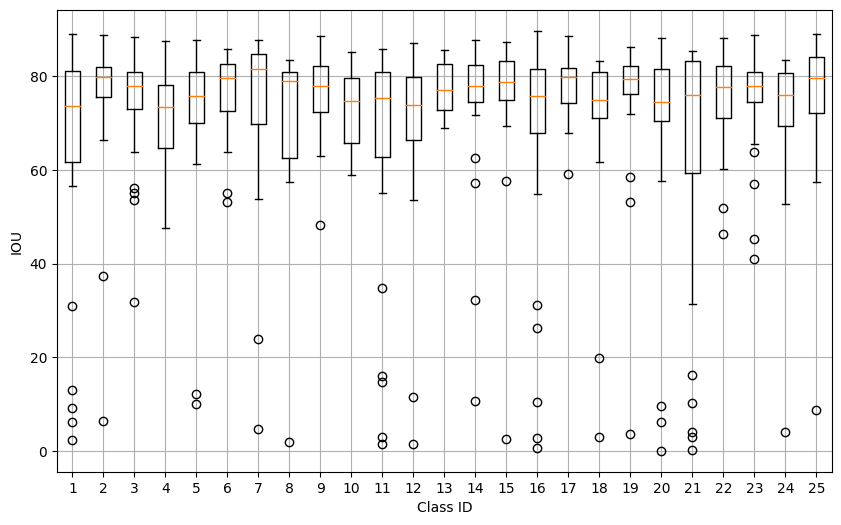

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取txt文件到DataFrame
data = pd.read_csv("./results/dss_iouap.txt", header=None, names=['class_id', 'iou', 'ap'])

# 根据class_id进行分组
grouped_data = data.groupby('class_id')

# 准备箱线图数据
boxplot_data = [group['iou'].tolist() for _, group in grouped_data]

# 设置箱线图标签
class_labels = grouped_data.groups.keys()
class_labels = [str(class_id) for class_id in class_labels]

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=class_labels, vert=True)
plt.xlabel('Class ID')
plt.ylabel('IOU')
plt.grid(True)

# 显示图形
plt.show()


In [10]:
data_cls = pd.read_csv("./dataset/metafiles/classes/classes.txt", header=None, names=['id', 'class_name'], sep=" ")

In [23]:
data_cls['class_name'][0]

'Bombus_lapidarius'

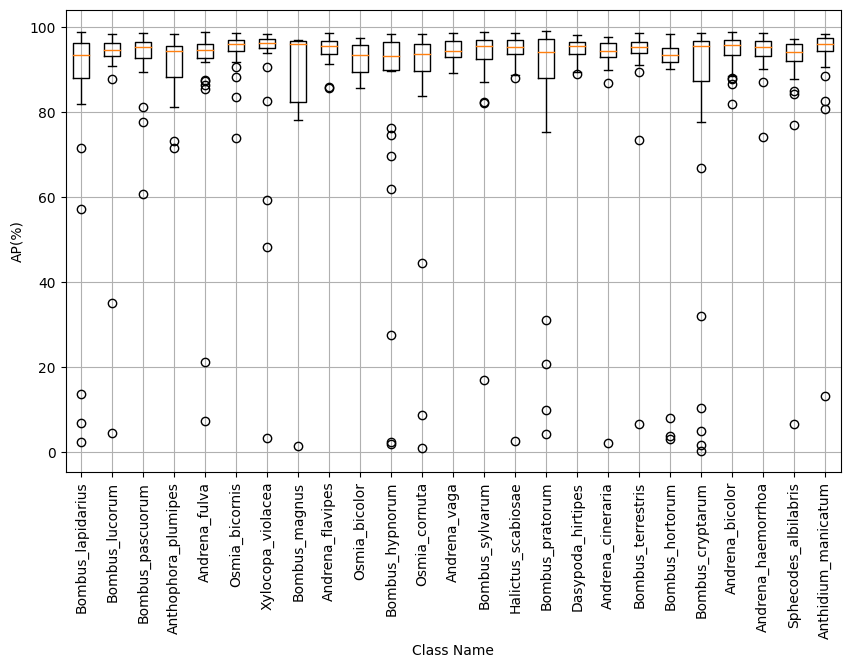

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取txt文件到DataFrame
data = pd.read_csv("./results/dss_iouap.txt", header=None, names=['class_id', 'iou', 'ap'])

# 根据class_id进行分组
grouped_data = data.groupby('class_id')

# 准备箱线图数据
boxplot_data = [group['ap'].tolist() for _, group in grouped_data]

# 设置箱线图标签
class_labels = grouped_data.groups.keys()
class_labels = [str(data_cls['class_name'][class_id-1]) for class_id in class_labels]

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=class_labels, vert=True)
plt.xlabel('Class Name')
plt.ylabel('AP(%)')

plt.xticks(range(1, len(class_labels) + 1), class_labels, rotation='vertical')

plt.grid(True)

# 显示图形
plt.show()


In [45]:
# 读取txt文件到DataFrame
data = pd.read_csv("./results/clipseg_iouap.txt", header=None, names=['class_id', 'iou', 'ap'])
filtered_df = data[(data['ap'] - data['iou'] > 50) & (data['iou'] < 40)]

# 打印满足条件的数据
print(filtered_df)

     class_id        iou         ap
74         11  25.307319  85.603255
94         17  19.605702  80.453956
348        21  13.387454  83.176196
479         1  24.876213  87.152869


In [59]:
showcases_id = [74, 94, 348, 479]
showcases = []

In [60]:
for i in range(len(showcases_id)):
  img_ori = get_img(showcases_id[i] + 1)
  showcases.append(img_ori)

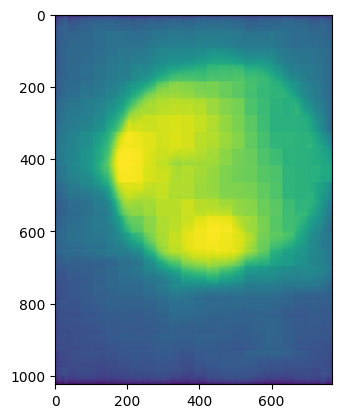

In [58]:
plt.imshow(pred[0])

In [64]:
pred = clipseg(showcases[0])[0]
pred.shape

torch.Size([1024, 768])

In [65]:
from myutils import CLIPSeg
_, clipseg = CLIPSeg.get_segment(["insect shaped"])

for i in range(len(showcases_id)):
  pred = clipseg(showcases[i])[0]
  showcases.append(pred)

In [70]:
for i in range(len(showcases_id)):
  pred_bi = toBinary(toGreyscale(showcases[i+4]), 0.78)
  showcases.append(pred_bi)

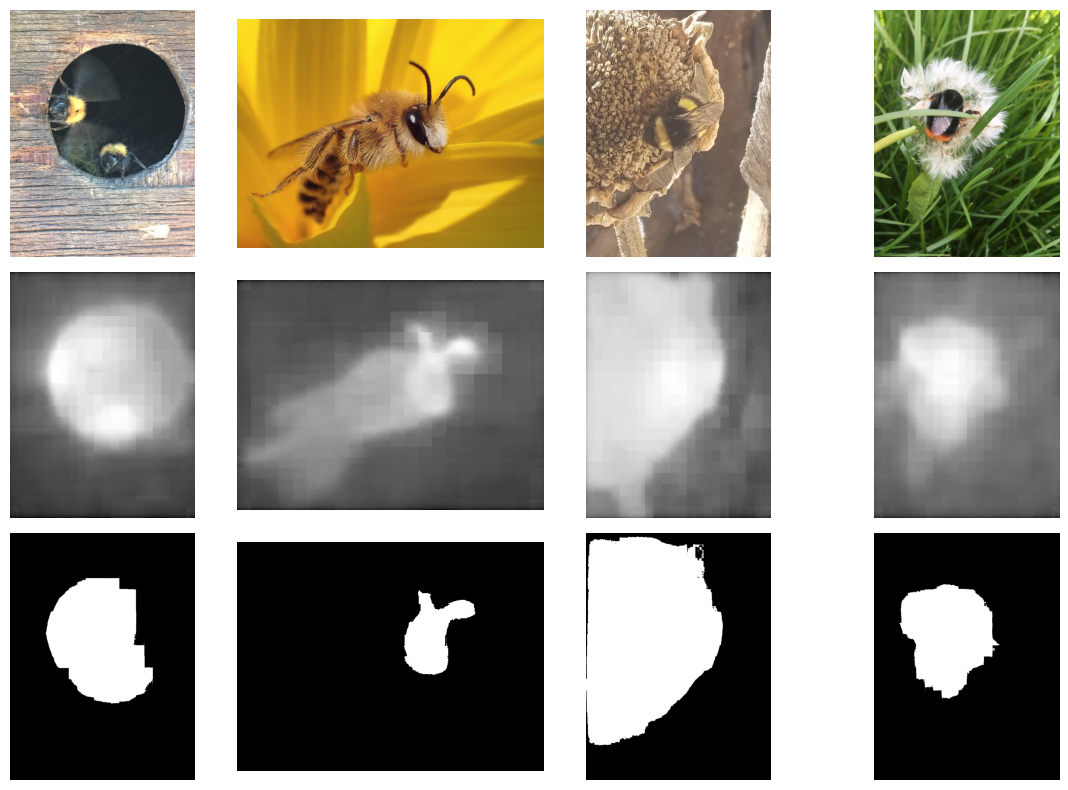

In [71]:
from myutils.showcase import showShowcases

showShowcases(showcases, 3, _add_label=False)

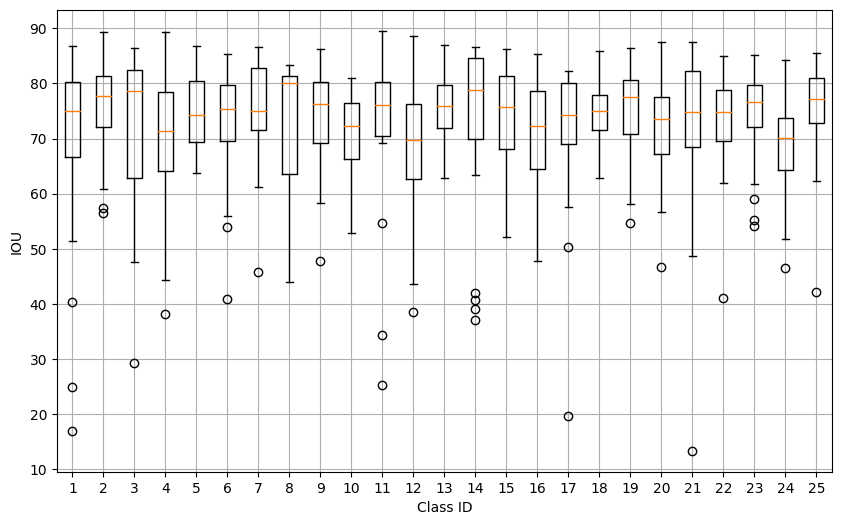

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取txt文件到DataFrame
data = pd.read_csv("./results/clipseg_iouap.txt", header=None, names=['class_id', 'iou', 'ap'])

# 根据class_id进行分组
grouped_data = data.groupby('class_id')

# 准备箱线图数据
boxplot_data = [group['iou'].tolist() for _, group in grouped_data]

# 设置箱线图标签
class_labels = grouped_data.groups.keys()
class_labels = [str(class_id) for class_id in class_labels]

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=class_labels, vert=True)
plt.xlabel('Class ID')
plt.ylabel('IOU')
plt.grid(True)

# 显示图形
plt.show()


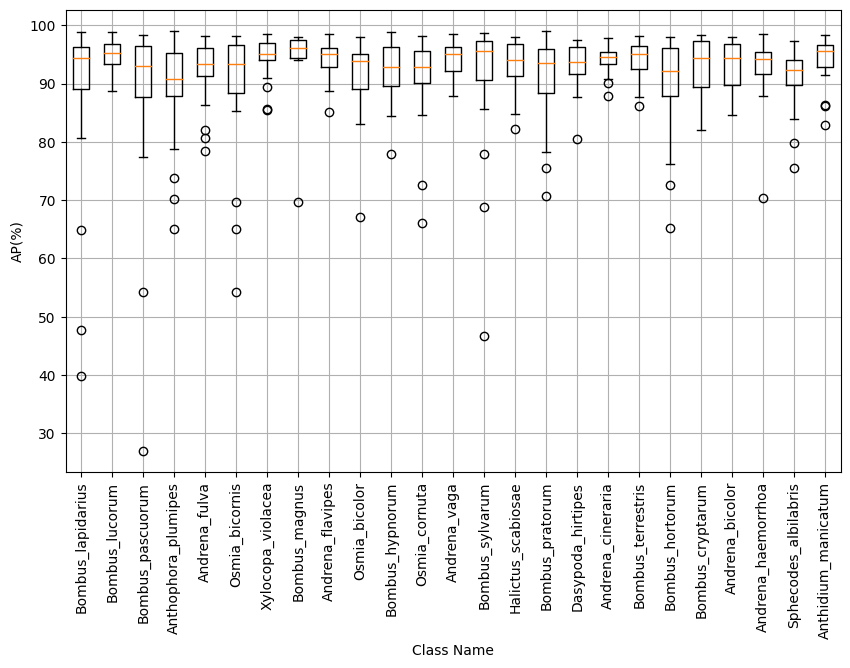

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取txt文件到DataFrame
data = pd.read_csv("./results/clipseg_iouap.txt", header=None, names=['class_id', 'iou', 'ap'])

# 根据class_id进行分组
grouped_data = data.groupby('class_id')

# 准备箱线图数据
boxplot_data = [group['ap'].tolist() for _, group in grouped_data]

# 设置箱线图标签
class_labels = grouped_data.groups.keys()
class_labels = [str(data_cls['class_name'][class_id-1]) for class_id in class_labels]

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=class_labels, vert=True)
plt.xlabel('Class Name')
plt.ylabel('AP(%)')

plt.xticks(range(1, len(class_labels) + 1), class_labels, rotation='vertical')

plt.grid(True)

# 显示图形
plt.show()
